In [1]:
from sys import path
from pathlib import Path

ROOT = Path().resolve().parent
if str(ROOT) not in path:
    path.insert(0, str(ROOT))
    print(f"Added {ROOT} to sys.path")

import pprint
from utils.dataset_loader import get_dataset_path, load_dataset, get_data_split
from utils.dataset_preprocessor import make_train_valid_split, to_spark_dfs, stop_spark_session, stratified_split_dataset
from batchtrainingbooster.trainers.catboost_trainer import CatBoostTrainer
from batchtrainingbooster.trainers.xgboost_trainer import XGBoostTrainer



print('Load Multiclass Dataset')
dataset_path = get_dataset_path("data/multiclass_dataset")
df = load_dataset(dataset_path)

print(f"Loaded dataset: {dataset_path.name}, shape = {df.shape}")
display(df.head())

print('*'*50)
print('*'*50)

print('Load Binary Dataset')

train_df = get_data_split("train")
print(f"Loaded training dataset: shape = {train_df.shape}")
display(train_df.head())


test_df = get_data_split("test")
print(f"Loaded test dataset: shape = {test_df.shape}")
display(test_df.head())


columns_todrop = ["Name", "PassengerId"]
train_df = train_df.drop(columns=columns_todrop)
test_df = test_df.drop(columns=columns_todrop)

print(f"Training dataset shape after dropping columns {columns_todrop}: {train_df.shape}")
print(f"Test dataset shape after dropping columns {columns_todrop}: {test_df.shape}")

#print('Split - Binary Dataset In Train/Valid and Transform in spark dataframe')
#print("Splitting training data into train and validation sets...")
#train_df, valid_df = make_train_valid_split(train_df,target='Survived', train_size = 0.8,val_size = 0.2,random_state=42)
#print(f"Train set shape: {train_df.shape}, Validation set shape: {valid_df.shape}")

#print("Converting pandas DataFrames to Spark DataFrames...")
#spark_train_df, spark_valid_df = to_spark_dfs(train_df, valid_df)



Added /Users/surelmanda/Data-Science-Projects/batchtrainingbooster to sys.path
Load Multiclass Dataset
Loaded dataset: ObesityDataset.csv, shape = (2111, 17)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**************************************************
**************************************************
Load Binary Dataset
Loaded training dataset: shape = (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Loaded test dataset: shape = (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Training dataset shape after dropping columns ['Name', 'PassengerId']: (891, 10)
Test dataset shape after dropping columns ['Name', 'PassengerId']: (418, 9)


In [2]:
print('Load Big Binary Dataset (Diabetes)')

print('Load Multiclass Dataset')
dataset_path = get_dataset_path("data/big_binary_dataset")
big_df = load_dataset(dataset_path)

print(f"Loaded dataset: {dataset_path.name}, shape = {big_df.shape}")
display(big_df.head())

train_df, valid_df, test_df = stratified_split_dataset(
    big_df,
    target_column="diabetes",
    train_ratio=0.6,
    valid_ratio=0.2,
    test_ratio=0.2,
    shuffle=True,
    random_state=123
)


Load Big Binary Dataset (Diabetes)
Load Multiclass Dataset


Loaded dataset: binary_diabetes_dataset.csv, shape = (100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Dataset split results:
 - Train set: (60000, 9) → 60000 samples, 2 distinct classes
 - Valid set: (20000, 9) → 20000 samples, 2 distinct classes
 - Test set : (20000, 9) → 20000 samples, 2 distinct classes


=== Entraînement SANS exponential decay ===
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[Batch 01] lr=0.10000 | train_last=0.11351 | valid_last=0.12383
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 407
[LightGBM] [I

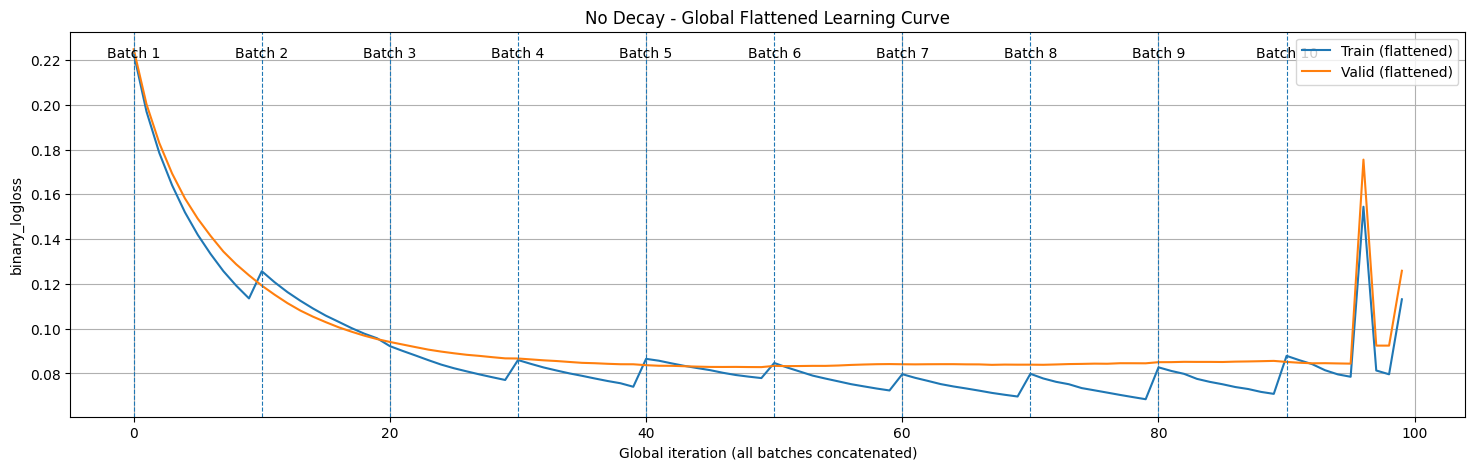

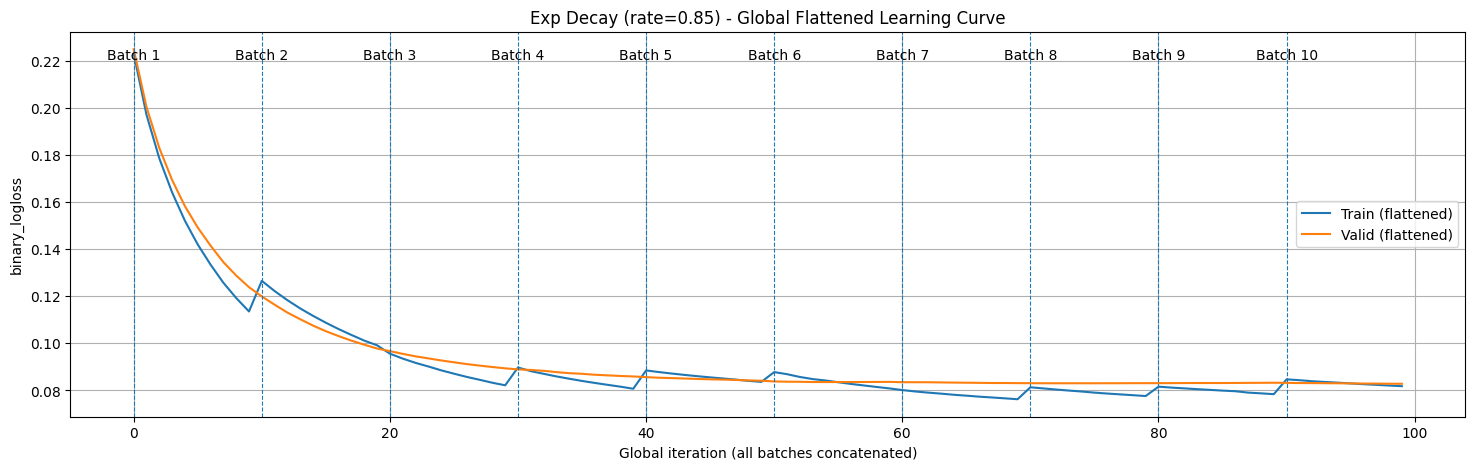


Résumé comparatif (fin de batch) :


,batch,valid_last_no_decay,valid_last_with_decay,lr_with_decay
0,1,0.12383,0.12383,0.10000
1,2,0.09534,0.09779,0.08500
2,3,0.08674,0.08937,0.07225
3,4,0.08410,0.08594,0.06141
4,5,0.08283,0.08412,0.05220
5,6,0.08419,0.08363,0.04437
6,7,0.08392,0.08310,0.03771
7,8,0.08453,0.08308,0.03206
8,9,0.08561,0.08326,0.02725
9,10,0.12586,0.08283,0.02316


In [28]:
# =========================================
# Utils
# =========================================
import pandas as pd
import numpy as np
from typing import List, Tuple, Union, Iterator, Dict, Optional
from copy import deepcopy
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

def get_categorical_features(X: pd.DataFrame) -> Tuple[List[str], List[int]]:
    """
    Identifie les colonnes catégorielles d'un DataFrame.
    Retourne (cat_cols, cat_idx).
    """
    cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
    cat_idx = [X.columns.get_loc(col) for col in cat_cols]
    return cat_cols, cat_idx


def make_batches(
    X: Union[pd.DataFrame, np.ndarray],
    y: Union[pd.Series, np.ndarray],
    n_batches: int = 5,
    seed: int = 42,
    shuffle: bool = True
) -> Iterator[Tuple[int, Union[pd.DataFrame, np.ndarray], Union[pd.Series, np.ndarray]]]:
    """
    Split stratifié en n_batches. Yield (batch_idx, X_b, y_b).
    """
    y_arr = y.values if isinstance(y, (pd.Series, pd.DataFrame)) else y
    X_arr = X.values if isinstance(X, (pd.DataFrame, pd.Series)) else X
    skf = StratifiedKFold(n_splits=n_batches, shuffle=shuffle, random_state=seed)

    for i, (_, batch_idx) in enumerate(skf.split(X_arr, y_arr), start=1):
        X_b = X.iloc[batch_idx] if isinstance(X, pd.DataFrame) else X[batch_idx]
        y_b = y.iloc[batch_idx] if isinstance(y, pd.Series) else y[batch_idx]
        yield i, X_b, y_b


def cast_categoricals(X_train: pd.DataFrame, X_valid: pd.DataFrame, cat_cols: List[str]) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Cast les colonnes catégorielles en dtype 'category' pour LightGBM.
    """
    X_train_cast = X_train.copy()
    X_valid_cast = X_valid.copy()
    for col in cat_cols:
        X_train_cast[col] = X_train_cast[col].astype("category")
        X_valid_cast[col] = X_valid_cast[col].astype("category")
    return X_train_cast, X_valid_cast


# =========================================
# Entraînement batch-wise LightGBM
# =========================================
class BatchTrainResult:
    def __init__(
        self,
        global_train_loss: List[List[float]],
        global_valid_loss: List[List[float]],
        metric_name: str,
        learning_rates: List[float]
    ):
        self.global_train_loss = global_train_loss
        self.global_valid_loss = global_valid_loss
        self.metric_name = metric_name
        self.learning_rates = learning_rates

    def flattened(self) -> Tuple[List[float], List[float]]:
        flat_train = [loss for curve in self.global_train_loss for loss in curve]
        flat_valid = [loss for curve in self.global_valid_loss for loss in curve]
        return flat_train, flat_valid

    def batch_start_indices(self) -> List[int]:
        return list(np.cumsum([0] + [len(curve) for curve in self.global_train_loss[:-1]]))


def train_lgbm_over_batches(
    X_train: pd.DataFrame,
    y_train: Union[pd.Series, np.ndarray],
    X_valid: pd.DataFrame,
    y_valid: Union[pd.Series, np.ndarray],
    *,
    n_batches: int = 10,
    base_params: Optional[Dict] = None,
    # --- Paramètres pour exponential decay du learning rate ---
    use_exp_decay: bool = False,
    initial_lr: float = 0.1,
    decay_rate: float = 0.9,     # learning_rate_b = initial_lr * decay_rate**(b-1)
    min_lr: float = 1e-3,
    random_state: int = 42,
) -> BatchTrainResult:
    """
    Entraîne un LGBMClassifier par batchs. Si use_exp_decay=True, applique une
    décroissance exponentielle du learning rate à chaque batch.
    Retourne les courbes train/valid par batch + les LR utilisés.
    """
    # Paramètres par défaut
    params = dict(
        objective="binary",
        learning_rate=initial_lr,
        n_estimators=10,    # nb d'arbres ajoutés à chaque batch
        num_leaves=15,
        random_state=random_state,
    )
    if base_params:
        params.update(base_params)

    # Prépare les colonnes catégorielles (LightGBM gère 'category' nativement)
    cat_cols, _ = get_categorical_features(X_train)
    X_train_cast, X_valid_cast = cast_categoricals(X_train, X_valid, cat_cols)

    # Cible en int
    y_train_arr = y_train.astype(int) if isinstance(y_train, pd.Series) else y_train
    y_valid_arr = y_valid.astype(int) if isinstance(y_valid, pd.Series) else y_valid

    global_train_loss: List[List[float]] = []
    global_valid_loss: List[List[float]] = []
    metric_name: str = "binary_logloss"
    learning_rates_used: List[float] = []

    previous_model: Optional[LGBMClassifier] = None

    for b, X_b, y_b in make_batches(X_train_cast, y_train_arr, n_batches=n_batches, seed=random_state, shuffle=True):
        # Learning rate courant (avec ou sans decay)
        if use_exp_decay:
            lr_b = max(min_lr, initial_lr * (decay_rate ** (b - 1)))
        else:
            lr_b = initial_lr
        learning_rates_used.append(lr_b)

        # Instancie le modèle avec le LR adapté
        params_b = {**params, "learning_rate": lr_b}
        model = LGBMClassifier(**params_b)

        # Fit sur le batch courant + valid global
        model.fit(
            X_b,
            y_b,
            eval_set=[(X_b, y_b), (X_valid_cast, y_valid_arr)],
            eval_names=["train", "valid"],
            eval_metric="logloss",
            categorical_feature=cat_cols if len(cat_cols) > 0 else "auto",
            init_model=previous_model if previous_model is not None else None
        )
        previous_model = deepcopy(model)

        # Récupère les courbes de ce batch
        evals = model.evals_result_
        # Robustesse: clé exacte selon eval_names
        train_metrics = evals.get("train", {}) or evals.get("training", {})
        if len(train_metrics) > 0:
            metric_name = next(iter(train_metrics.keys()))
        train_curve = evals["train"][metric_name]
        valid_curve = evals["valid"][metric_name]

        global_train_loss.append(train_curve)
        global_valid_loss.append(valid_curve)

        # Logs rapides (optionnels)
        print(f"[Batch {b:02d}] lr={lr_b:.5f} | "
              f"train_last={train_curve[-1]:.5f} | valid_last={valid_curve[-1]:.5f}")

    return BatchTrainResult(
        global_train_loss=global_train_loss,
        global_valid_loss=global_valid_loss,
        metric_name=metric_name,
        learning_rates=learning_rates_used
    )


# =========================================
# Visualisations
# =========================================
def plot_flattened_curves(
    result: BatchTrainResult,
    title_prefix: str = "",
    figsize: Tuple[int, int] = (18, 5)
) -> None:
    """
    Trace les courbes aplaties (train/valid) et marque les frontières de batch.
    """
    flat_train, flat_valid = result.flattened()
    starts = result.batch_start_indices()

    plt.figure(figsize=figsize)
    plt.plot(flat_train, label="Train (flattened)")
    plt.plot(flat_valid, label="Valid (flattened)")

    ax = plt.gca()
    for i, x in enumerate(starts):
        ax.axvline(x=x, linestyle="--", linewidth=0.8)
        ax.text(x, ax.get_ylim()[1]*0.95, f"Batch {i+1}", ha="center")

    plt.title(f"{title_prefix} - Global Flattened Learning Curve")
    plt.xlabel("Global iteration (all batches concatenated)")
    plt.ylabel(result.metric_name)
    plt.legend()
    plt.grid(True)
    plt.show()


def compare_no_decay_vs_decay(
    X_train: pd.DataFrame,
    y_train: Union[pd.Series, np.ndarray],
    X_valid: pd.DataFrame,
    y_valid: Union[pd.Series, np.ndarray],
    *,
    n_batches: int = 10,
    base_params: Optional[Dict] = None,
    initial_lr: float = 0.1,
    decay_rate: float = 0.9,
    min_lr: float = 1e-3,
    random_state: int = 42
) -> Tuple[BatchTrainResult, BatchTrainResult]:
    """
    Lance 2 entraînements: (1) sans decay (2) avec decay exponentiel.
    Affiche les 2 courbes + un récapitulatif synthétique.
    """
    print("=== Entraînement SANS exponential decay ===")
    res_no_decay = train_lgbm_over_batches(
        X_train, y_train, X_valid, y_valid,
        n_batches=n_batches,
        base_params=base_params,
        use_exp_decay=False,
        initial_lr=initial_lr,
        decay_rate=decay_rate,
        min_lr=min_lr,
        random_state=random_state
    )

    print("\n=== Entraînement AVEC exponential decay ===")
    res_with_decay = train_lgbm_over_batches(
        X_train, y_train, X_valid, y_valid,
        n_batches=n_batches,
        base_params=base_params,
        use_exp_decay=True,
        initial_lr=initial_lr,
        decay_rate=decay_rate,
        min_lr=min_lr,
        random_state=random_state
    )

    # Tracés
    plot_flattened_curves(res_no_decay, title_prefix="No Decay")
    plot_flattened_curves(res_with_decay, title_prefix=f"Exp Decay (rate={decay_rate})")

    # Récapitulatif comparatif (dernier point de valid à la fin de chaque batch)
    last_valid_no_decay = [curve[-1] for curve in res_no_decay.global_valid_loss]
    last_valid_with_decay = [curve[-1] for curve in res_with_decay.global_valid_loss]

    summary = pd.DataFrame({
        "batch": list(range(1, n_batches+1)),
        "valid_last_no_decay": last_valid_no_decay,
        "valid_last_with_decay": last_valid_with_decay,
        "lr_with_decay": res_with_decay.learning_rates,
    })
    print("\nRésumé comparatif (fin de batch) :")
    display(summary.style.format(precision=5))

    return res_no_decay, res_with_decay


# =========================================
# === Exemple d'utilisation (branche sur tes données) ===
# =========================================
# Hypothèse: tu as déjà train_df, valid_df et target_column définis.
target_column = 'diabetes'
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_valid = valid_df.drop(columns=[target_column])
y_valid = valid_df[target_column]

# Paramètres LightGBM de base (tu peux ajuster n_estimators par batch, etc.)
base_params = dict(
     objective="binary",
     n_estimators=10,
     num_leaves=15,
     random_state=42
 )

# Lancement comparaison :
res_no_decay, res_with_decay = compare_no_decay_vs_decay(
     X_train, y_train, X_valid, y_valid,
     n_batches=10,
     base_params=base_params,
     initial_lr=0.1,     # LR de départ
     decay_rate=0.85,    # facteur de décroissance exponentielle
     min_lr=1e-3,        # plancher pour stabiliser
     random_state=42
     )


['gender', 'smoking_history']
[0, 4]
Batch 1 → X_b.shape=(6000, 8), y_b.shape=(6000,)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
34574,Female,43.0,0,0,No Info,32.61,6.0,100
68687,Female,58.0,0,0,No Info,26.22,4.8,130
45636,Male,17.0,0,0,No Info,26.68,3.5,158
828,Female,5.0,0,0,never,16.22,4.5,85
91630,Male,42.0,1,0,never,32.65,6.5,200


'\n'

Batch 1 → 6000 samples, 2 distinct classes
{0: 5490, 1: 510}

⚡ Initializing LightGBM model...
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
Train: [np.float64(0.22294911308503979), np.float64(0.19694174958297322), np.float64(0.17846682954845586), np.float64(0.16401605272520117), np.float64(0.15197351979352205), np.float64(0.14192789867632963), np.float64(0.1333818255999451), np.float64(0.12570104425458944), np.float64(0.11922332747713894), np.float64(0.11351314679564424)]
Valid: [np.float

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
35321,Female,20.0,0,0,never,19.69,5.7,200
33375,Male,80.0,0,1,never,28.46,4.0,85
54132,Female,23.0,0,0,never,27.32,6.2,126
77075,Female,51.0,1,0,No Info,26.35,6.2,80
26910,Male,30.0,0,0,never,21.53,6.6,158


'\n'

Batch 2 → 6000 samples, 2 distinct classes
{0: 5490, 1: 510}

⚡ Initializing LightGBM model...
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 8
Train: [np.float64(0.12566301165361202), np.float64(0.12073245010882298), np.float64(0.1163419057131891), np.float64(0.11250706757549836), np.float64(0.10900102869371812), np.float64(0.10580761254865104), np.float64(0.10305920694651255), np.float64(0.10027686803398649), np.float64(0.09777221253805551), np.float64(0.09570887819610555)]
Valid: [np.float64(0.11922874919431026), np.float64(0.11517434857960056), np.float64(0.11141176030179013), np.float64(0.10811650684788794), np.float64

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
92162,Male,56.0,0,1,not current,44.15,4.0,158
69324,Female,12.0,0,0,No Info,27.32,4.0,130
324,Female,43.0,0,0,never,27.82,5.8,159
80376,Male,80.0,0,0,not current,29.38,6.6,85
36602,Male,28.0,0,0,current,24.89,6.5,160


'\n'

Batch 3 → 6000 samples, 2 distinct classes
{0: 5490, 1: 510}

⚡ Initializing LightGBM model...
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 8
Train: [np.float64(0.09220155402967699), np.float64(0.09006041747251084), np.float64(0.08802658438080796), np.float64(0.08594269034145673), np.float64(0.08396387754918865), np.float64(0.08232870083550822), np.float64(0.08092717138406978), np.float64(0.07956772879600389), np.float64(0.07830717121869678), np.float64(0.07708712269887669)]
Valid: [np.float64(0.09407010756546692), np.float64(0.09291973961114094), np.float64(0.09176690680945851), np.float64(0.09064650066199798), np.float6

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
12839,Female,29.0,0,0,not current,44.80,4.5,126
591,Female,15.0,0,0,never,27.32,5.8,90
4570,Male,46.0,0,0,current,20.82,5.0,145
8758,Female,18.0,0,0,never,20.05,4.0,158
60998,Female,14.0,0,0,never,24.32,5.7,145


'\n'

Batch 4 → 6000 samples, 2 distinct classes
{0: 5490, 1: 510}

⚡ Initializing LightGBM model...
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 8
Train: [np.float64(0.08599698777036634), np.float64(0.08428968286380827), np.float64(0.08268257089600159), np.float64(0.08133262033471202), np.float64(0.08004897070453018), np.float64(0.07894150531878874), np.float64(0.0777552524839265), np.float64(0.07662332801967463), np.float64(0.07562816041166784), np.float64(0.07406049251552238)]
Valid: [np.float64(0.08668098576671834), np.float64(0.08627771346489481), np.float64(0.08586688816133378), np.float64(0.08555557032480253), np.float64

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
43410,Male,17.00,0,0,No Info,38.78,4.0,145
781,Female,3.00,0,0,No Info,17.46,5.7,145
89311,Male,0.72,0,0,No Info,17.03,5.7,130
25371,Female,65.00,0,0,not current,27.32,6.0,159
15459,Male,80.00,0,0,former,27.32,6.6,90


'\n'

Batch 5 → 6000 samples, 2 distinct classes
{0: 5490, 1: 510}

⚡ Initializing LightGBM model...
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 8
Train: [np.float64(0.08652026863222899), np.float64(0.08569252621939101), np.float64(0.08449646009643023), np.float64(0.0833766183038314), np.float64(0.08239984212736777), np.float64(0.08147655433763389), np.float64(0.08029819817763745), np.float64(0.07931061437840335), np.float64(0.07858139027050468), np.float64(0.07793770111883111)]
Valid: [np.float64(0.08369181749926201), np.float64(0.08344126402632508), np.float64(0.08340873032521909), np.float64(0.08322644379157039), np.float64

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
12720,Female,13.0,0,0,No Info,17.34,6.2,140
24614,Male,2.0,0,0,never,20.90,6.1,158
75770,Male,49.0,1,0,No Info,27.32,4.0,85
28958,Male,80.0,1,0,never,27.32,5.8,200
43333,Male,72.0,0,0,former,28.02,5.7,145


'\n'

Batch 6 → 6000 samples, 2 distinct classes
{0: 5490, 1: 510}

⚡ Initializing LightGBM model...
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 8
Train: [np.float64(0.08467055893115935), np.float64(0.08268333640264473), np.float64(0.08086237036984037), np.float64(0.07904061341210064), np.float64(0.07771976656045135), np.float64(0.07648042971766852), np.float64(0.0752200293374704), np.float64(0.07423045100714638), np.float64(0.07326562822738611), np.float64(0.07240768444243348)]
Valid: [np.float64(0.08337945929709617), np.float64(0.08327613472328126), np.float64(0.08332095039100712), np.float64(0.08339277785322242), np.float64(0.0833865241716686), np.float64(0.08355171646354542), np.float6

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
1219,Female,70.0,0,0,No Info,27.32,6.5,100
99118,Female,46.0,0,0,never,33.62,5.8,85
98267,Male,54.0,0,0,never,34.70,6.5,100
372,Female,56.0,0,0,not current,26.62,3.5,160
22537,Male,67.0,0,0,not current,27.32,6.2,126


'\n'

Batch 7 → 6000 samples, 2 distinct classes
{0: 5490, 1: 510}

⚡ Initializing LightGBM model...
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 8
Train: [np.float64(0.07968248173800936), np.float64(0.07805484903144658), np.float64(0.07667660544317244), np.float64(0.07524621690969337), np.float64(0.07418962471879964), np.float64(0.0732832863900998), np.float64(0.07232584810490196), np.float64(0.07131061983722084), np.float64(0.0704756490919663), np.float64(0.06970488684015438)]
Valid: [np.float64(0.08411402280982479), np.float64(0.08406352861254948), np.float64(0.08411791533806566), np.float64(0.08414282338210465), np.float64(

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
64918,Female,17.0,0,0,never,18.68,4.5,80
52939,Male,33.0,0,0,No Info,26.00,3.5,80
10635,Female,31.0,0,0,never,27.70,5.8,145
56082,Male,44.0,0,0,No Info,24.36,6.5,159
21940,Female,21.0,0,0,never,28.53,6.5,100


'\n'

Batch 8 → 6000 samples, 2 distinct classes
{0: 5490, 1: 510}

⚡ Initializing LightGBM model...
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 8
Train: [np.float64(0.07984363704821691), np.float64(0.07777256022686442), np.float64(0.0762686273556532), np.float64(0.07519500849851894), np.float64(0.07347405631260859), np.float64(0.07246700298075223), np.float64(0.07144667450037334), np.float64(0.07041425739376625), np.float64(0.0694401490975316), np.float64(0.06849483292476918)]
Valid: [np.float64(0.08393079282892757), np.float64(0.08387054798388112), np.float64(0.08401823881636271), np.float64(0.08419350878155675), np.float64(

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
5041,Male,47.00,0,0,not current,27.32,6.2,159
54489,Female,80.00,0,0,former,27.32,5.0,145
96626,Male,51.00,0,0,never,26.67,6.5,155
55636,Male,55.00,0,0,current,27.32,6.2,159
29271,Female,0.72,0,0,No Info,11.55,3.5,90


'\n'

Batch 9 → 6000 samples, 2 distinct classes
{0: 5490, 1: 510}

⚡ Initializing LightGBM model...
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 8
Train: [np.float64(0.08273598834475665), np.float64(0.08111959361483154), np.float64(0.07981934304282451), np.float64(0.07758776189414231), np.float64(0.0762507216094093), np.float64(0.07517916414738274), np.float64(0.07393681029070137), np.float64(0.07305151911131269), np.float64(0.0717668036576573), np.float64(0.07088698066690423)]
Valid: [np.float64(0.08503711861246968), np.float64(0.0850578722598525), np.float64(0.08519542766295007), np.float64(0.08516043378803297), np.float64(0

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
28140,Male,80.0,1,0,never,30.71,6.6,200
5142,Male,80.0,0,1,former,23.31,6.5,159
75222,Male,29.0,0,0,ever,22.65,5.0,126
69633,Male,18.0,0,0,No Info,24.47,6.5,158
84033,Male,57.0,0,1,former,26.50,6.1,100


'\n'

Batch 10 → 6000 samples, 2 distinct classes
{0: 5490, 1: 510}

⚡ Initializing LightGBM model...
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 8
Train: [np.float64(0.08785897774497502), np.float64(0.08591985584074394), np.float64(0.08415200601678786), np.float64(0.08144292715959134), np.float64(0.07959010991398079), np.float64(0.07852207671048843), np.float64(0.1544577836250651), np.float64(0.08131857755545142), np.float64(0.07963271749500528), np.float64(0.11312155435788195)]
Valid: [np.float64(0.08514955123209635), np.float64(0.08478902331088974), np.float64(0.0845354039156309), np.float64(0.08458440479709625), np.float64

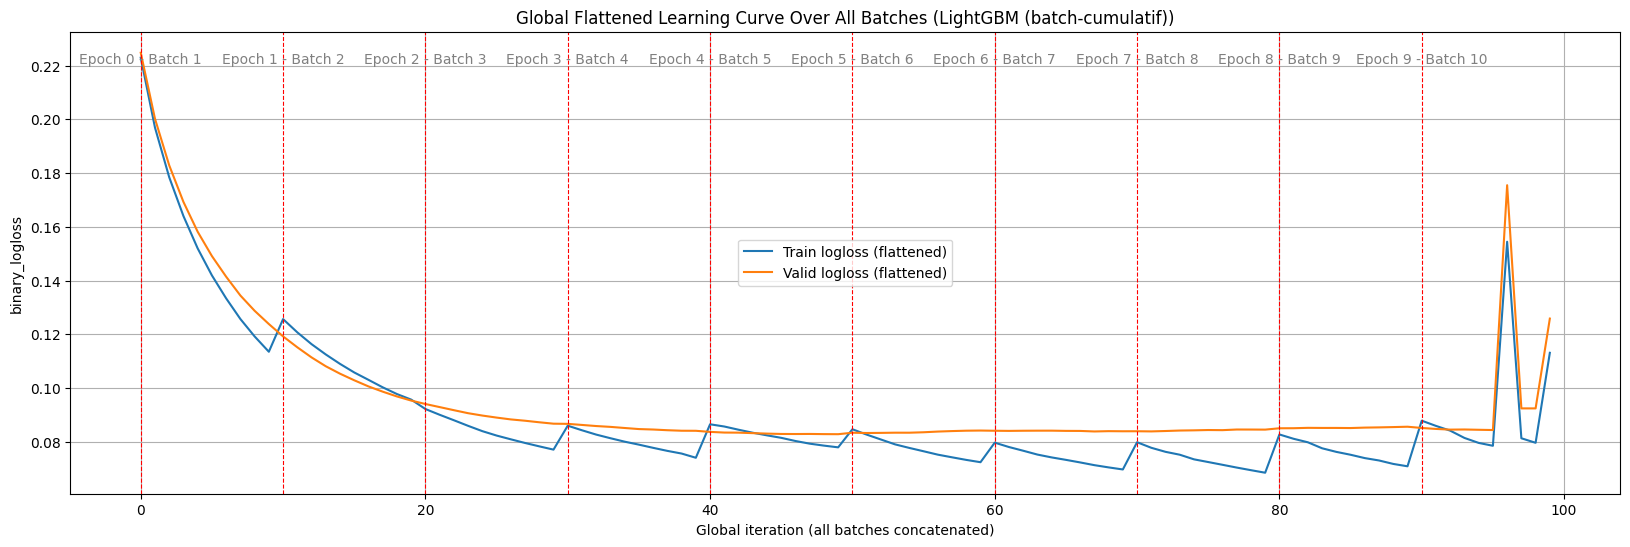

In [27]:
import pandas as pd
import numpy as np
from copy import deepcopy
from typing import List
from lightgbm import LGBMClassifier
from typing import Iterator, Tuple, Union
from typing import Union, Iterator, Tuple
from sklearn.model_selection import StratifiedKFold

def get_categorical_features(X: pd.DataFrame) -> Tuple[List[str], List[int]]:
    """
    Identify categorical features in a DataFrame.

    Parameters
    ----------
    X : pd.DataFrame
        Input DataFrame.

    Returns
    -------
    cat_cols : list of str
        Names of categorical columns.
    cat_idx : list of int
        Indices of categorical columns.
    """
    # Colonnes catégorielles par dtype
    cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
    
    # Indices correspondants
    cat_idx = [X.columns.get_loc(col) for col in cat_cols]

    return cat_cols, cat_idx

def make_batches(
    X: Union[pd.DataFrame, np.ndarray],
    y: Union[pd.Series, np.ndarray],
    n_batches: int = 5,
    seed: int = 42,
    shuffle: bool = True
) -> Iterator[Tuple[int, Union[pd.DataFrame, np.ndarray], Union[pd.Series, np.ndarray]]]:
    """
    Stratified split of dataset into `n_batches` disjoint parts and yield them one by one.
    Ensures that each batch contains all classes in proportions close to the global dataset.

    Parameters
    ----------
    X : DataFrame or ndarray
        Features.
    y : Series or ndarray
        Labels (required for stratification).
    n_batches : int, default=5
        Number of batches to create.
    seed : int, default=42
        Random seed for reproducibility.
    shuffle : bool, default=True
        Whether to shuffle before splitting.

    Yields
    ------
    (batch_idx, X_batch, y_batch)
        Batch index (starting from 1), and corresponding features/labels.
    """
    # Convert to numpy for StratifiedKFold
    if isinstance(y, (pd.Series, pd.DataFrame)):
        y_arr = y.values
    else:
        y_arr = y

    if isinstance(X, (pd.DataFrame, pd.Series)):
        X_arr = X.values
    else:
        X_arr = X

    skf = StratifiedKFold(n_splits=n_batches, shuffle=shuffle, random_state=seed)

    for i, (_, batch_idx) in enumerate(skf.split(X_arr, y_arr), start=1):
        X_b = X.iloc[batch_idx] if isinstance(X, pd.DataFrame) else X[batch_idx]
        y_b = y.iloc[batch_idx] if isinstance(y, pd.Series) else y[batch_idx]
        yield i, X_b, y_b

# Split
target_column = 'diabetes'
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_valid = valid_df.drop(columns=[target_column])
y_valid = valid_df[target_column]

cat_cols, cat_idx = get_categorical_features(X_train)
print(cat_cols)
print(cat_idx)

for col in cat_cols:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")

# S’assurer que y est bien numérique (int) pour un classifier
y_train = y_train.astype(int)
y_valid = y_valid.astype(int)

# Batches cumulés
n_batches = 10
random_state = 42

# Paramètres LightGBM
params = dict(
    objective="binary",        # Problème de classification binaire
    learning_rate=0.1,         # Taux d’apprentissage
    n_estimators=10,           # Nombre max d’arbres (early stopping stoppera avant si nécessaire)
    num_leaves=15,             # Complexité de l’arbre (nb max de feuilles)
    random_state=42,           # Reproductibilité
)


# Suivi des métriques par batch
# global_train_loss et global_valid_loss : liste de listes de pertes
# (chaque sous-liste correspond aux pertes enregistrées à un batch donné)
global_train_loss: list[list[float]] = []
global_valid_loss: list[list[float]] = []

# Nom de la métrique utilisé (sera défini après le premier entraînement)
metric_name = None

# Références pour le modèle courant et le modèle précédent
model = None
previous_model = None

# Boucle sur les batchs
# Split en 4 batchs
for b, X_batch, y_batch in make_batches(X_train, y_train, n_batches=n_batches):
    print(f"Batch {b} → X_b.shape={X_batch.shape}, y_b.shape={y_batch.shape}")
    display(X_batch.head(), "\n")
    # display(y_b.head(), "\n")
    print(f"Batch {b} → {y_batch.count()} samples, {y_batch.nunique()} distinct classes")
    print(y_batch.value_counts().to_dict())  # effectifs par classe
    print()
    
    print("⚡ Initializing LightGBM model...")
    model = LGBMClassifier(**params)
    model.fit(
        X_batch,
        y_batch,
        eval_set=[(X_batch, y_batch), (X_valid, y_valid)],
        eval_names=["train", "valid"],
        eval_metric="logloss",  # laisser LightGBM nommer correctement (ex: 'binary_logloss')
        categorical_feature=cat_cols if len(cat_cols) > 0 else "auto",
        init_model = previous_model if previous_model is not None else None
    )
    previous_model = deepcopy(model)

    evals = model.evals_result_
    #print(evals)
    # Récupère le nom de métrique de façon robuste
    # ex: evals = {'training': {'binary_logloss': [...]}, 'valid_1': {'binary_logloss': [...]} }
    train_metrics = evals.get("train", {})
    metric_name = next(iter(train_metrics.keys())) if len(train_metrics) > 0 else "binary_logloss"

    print('Train:', evals["train"][metric_name])
    print('Valid:', evals["valid"][metric_name])


    print('Len - Train:', len(evals["train"][metric_name]))
    print('Len - Valid:', len(evals["valid"][metric_name]))
    
    global_train_loss.append(evals["train"][metric_name])
    global_valid_loss.append(evals["valid"][metric_name])



# ---- Plot des courbes par batch ----
import numpy as np
from matplotlib.pyplot import figure, plot, gca, title, xlabel, ylabel, legend, grid, show

# ---- Courbes "aplaties" + démarcations de batchs ----
flattened_train_loss = [loss for batch_curve in global_train_loss for loss in batch_curve]
flattened_val_loss   = [loss for batch_curve in global_valid_loss   for loss in batch_curve]

# indices de début de chaque batch dans la courbe aplatie (0, len(b1), len(b1)+len(b2), ...)
batch_start_indices = np.cumsum([0] + [len(curve) for curve in global_train_loss[:-1]])

# infos d’affichage
n_batches = len(global_train_loss)
global_iterations = list(range(1, n_batches + 1))  # [1, 2, ..., n_batches]
model_name = "LightGBM (batch-cumulatif)"
eval_metric = metric_name

figure(figsize=(20, 6))
plot(flattened_train_loss, label="Train logloss (flattened)")
plot(flattened_val_loss,   label="Valid logloss (flattened)")

ax1 = gca()
for idx, x in enumerate(batch_start_indices):
    # ligne verticale (garde celle à x=0 si tu veux matérialiser le tout début)
    ax1.axvline(x=x, color="red", linestyle="--", linewidth=0.8)

    # annotation
    ax1.text(
        x,
        ax1.get_ylim()[1] * 0.95,
        f"Epoch {idx} - Batch {global_iterations[idx]}",
        ha="center",
        fontsize=10,
        color="gray",
    )

title(f"Global Flattened Learning Curve Over All Batches ({model_name})")
xlabel("Global iteration (all batches concatenated)")
ylabel(eval_metric)
legend()
grid()
show()

[LightGBM] [Info] Number of positive: 66, number of negative: 112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 178, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

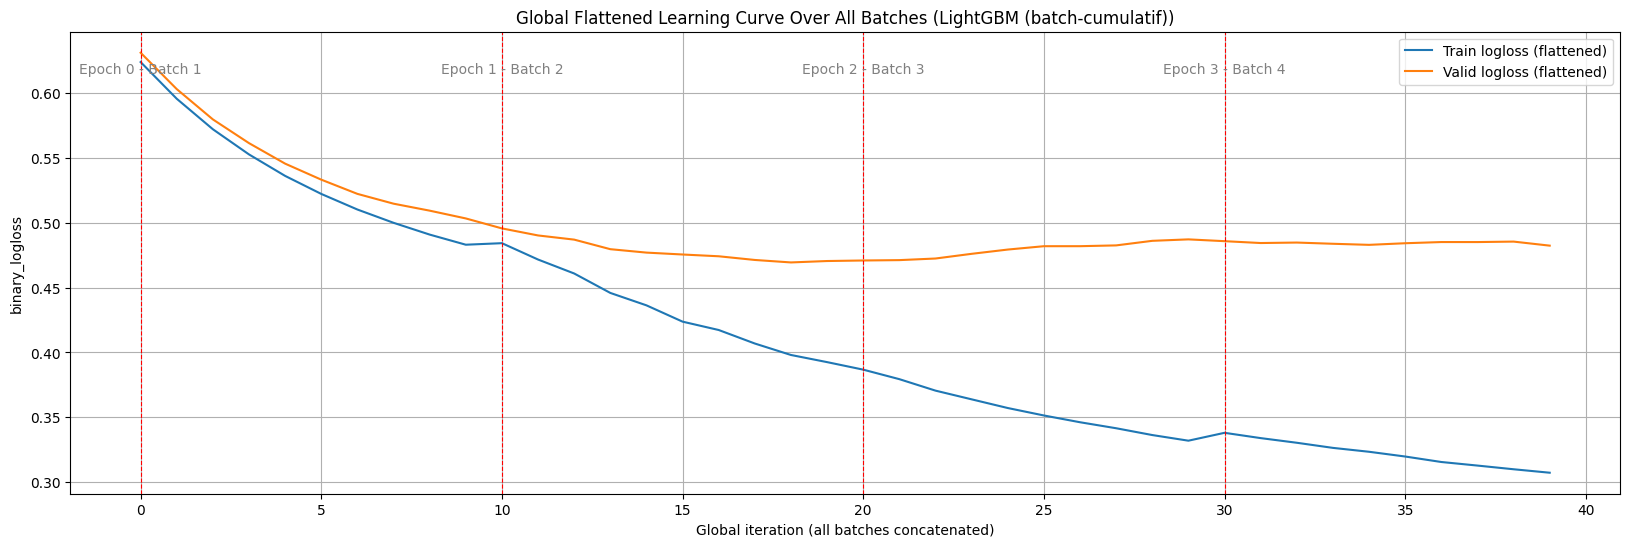

25/09/09 13:59:45 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:53)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:342)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:132)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:131)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:700)
	at org.apache.spark.storage.BlockManagerMasterE

In [5]:
import numpy as np
import pandas as pd
from copy import deepcopy
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.preprocessing import LabelEncoder

# ---------- Utils ----------
def ensure_binary_labels(y: pd.Series):
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Version binaire uniquement. Reçu {y.nunique()} classes.")
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index).astype(int)
    return yy, le

def make_batches(n, n_batches=5, seed=42, shuffle=True):
    idx = np.arange(n)
    if shuffle:
        rng = np.random.default_rng(seed)
        rng.shuffle(idx)
    return list(np.array_split(idx, n_batches))

def align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    Xtr, Xva = X_train.copy(), X_valid.copy()
    cat_cols = Xtr.select_dtypes(include=["object", "category"]).columns.tolist()

    for col in cat_cols:
        cats = pd.Categorical(Xtr[col]).categories
        Xtr[col] = pd.Categorical(Xtr[col], categories=cats)
        Xva[col] = pd.Categorical(Xva[col], categories=cats)

    bool_cols = Xtr.select_dtypes(include=["bool"]).columns.tolist()
    if len(bool_cols) > 0:
        Xtr[bool_cols] = Xtr[bool_cols].astype(int)
        Xva[bool_cols] = Xva[bool_cols].astype(int)

    Xva = Xva[Xtr.columns]
    return Xtr, Xva, cat_cols

# ---------- Fit batch ----------
def fit_lgbm_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    target_column: str,
    n_batches: int = 5,
    params: dict | None = None,
    random_state: int = 42,
    early_stopping_rounds: int | None = 50,
    log_eval_every: int = 50,
):
    """
    Entraîne un LGBMClassifier batch par batch (cumulatif).
    Retourne:
        model_last, global_train_loss, global_valid_loss, metric_name
    - global_*_loss : liste de listes (une liste par batch, valeur par itération)
    - metric_name : nom de la métrique dans evals_result_ (ex: 'binary_logloss')
    """
    # Split
    X_train = train_df.drop(columns=[target_column])
    y_train = train_df[target_column]
    X_valid = valid_df.drop(columns=[target_column])
    y_valid = valid_df[target_column]

    # Encode cible
    y_train_enc, le = ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
        if le else y_valid.astype(int)
    )

    # Align dtypes/cat
    X_train, X_valid, cat_cols = align_categoricals_for_lgbm(X_train, X_valid)

    # Batches cumulés
    batches_idx = make_batches(len(X_train), n_batches=n_batches, seed=random_state)

    # Params défaut
    if params is None:
        params = dict(
            objective="binary",
            learning_rate=0.05,
            n_estimators=2000,          # grand max; early stopping coupera
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.9,
            random_state=random_state,
        )

    cum_idx = np.array([], dtype=int)
    global_train_loss: list[list[float]] = []
    global_valid_loss: list[list[float]] = []
    metric_name = None
    model = None
    previous_model = None

    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])
        model = LGBMClassifier(**params)

        #callbacks = []
        #if early_stopping_rounds is not None and early_stopping_rounds > 0:
        #    callbacks.append(early_stopping(stopping_rounds=early_stopping_rounds, first_metric_only=True))
        #if log_eval_every is not None and log_eval_every > 0:
        #    callbacks.append(log_evaluation(period=log_eval_every))

        model.fit(
            X_train.iloc[cum_idx],
            y_train_enc.iloc[cum_idx],
            eval_set=[(X_train.iloc[cum_idx], y_train_enc.iloc[cum_idx]), (X_valid, y_valid_enc)],
            eval_metric="logloss",  # laisser LightGBM nommer correctement (ex: 'binary_logloss')
            categorical_feature=cat_cols if len(cat_cols) > 0 else "auto",
            init_model = previous_model if previous_model is not None else None
            # callbacks=callbacks if len(callbacks) > 0 else None,
        )
        previous_model = deepcopy(model)

        evals = model.evals_result_
        #print(evals)
        # Récupère le nom de métrique de façon robuste
        # ex: evals = {'training': {'binary_logloss': [...]}, 'valid_1': {'binary_logloss': [...]} }
        train_metrics = evals.get("valid_0", {})
        metric_name = next(iter(train_metrics.keys())) if len(train_metrics) > 0 else "binary_logloss"

        print('Train:', evals["valid_0"][metric_name])
        print('Valid:', evals["valid_1"][metric_name])


        print('Len - Train:', len(evals["valid_0"][metric_name]))
        print('Len - Valid:', len(evals["valid_1"][metric_name]))
        
        global_train_loss.append(evals["valid_0"][metric_name])
        global_valid_loss.append(evals["valid_1"][metric_name])

    return model, global_train_loss, global_valid_loss, metric_name




model, global_train_loss, global_valid_loss, metric_name = fit_lgbm_in_batches(
    train_df=train_df,
    valid_df=valid_df,
    target_column="Survived",
    n_batches=4,
    params=dict(
        objective="binary",
        learning_rate=0.1,
        n_estimators=10,   # grand max, early stopping fera le job
        num_leaves=15,
        random_state=42,
    ),
    early_stopping_rounds=30,
    log_eval_every=100,
)

# ---- Plot des courbes par batch ----
import numpy as np
from matplotlib.pyplot import figure, plot, gca, title, xlabel, ylabel, legend, grid, show

# ---- Courbes "aplaties" + démarcations de batchs ----
flattened_train_loss = [loss for batch_curve in global_train_loss for loss in batch_curve]
flattened_val_loss   = [loss for batch_curve in global_valid_loss   for loss in batch_curve]

# indices de début de chaque batch dans la courbe aplatie (0, len(b1), len(b1)+len(b2), ...)
batch_start_indices = np.cumsum([0] + [len(curve) for curve in global_train_loss[:-1]])

# infos d’affichage
n_batches = len(global_train_loss)
global_iterations = list(range(1, n_batches + 1))  # [1, 2, ..., n_batches]
model_name = "LightGBM (batch-cumulatif)"
eval_metric = metric_name

figure(figsize=(20, 6))
plot(flattened_train_loss, label="Train logloss (flattened)")
plot(flattened_val_loss,   label="Valid logloss (flattened)")

ax1 = gca()
for idx, x in enumerate(batch_start_indices):
    # ligne verticale (garde celle à x=0 si tu veux matérialiser le tout début)
    ax1.axvline(x=x, color="red", linestyle="--", linewidth=0.8)

    # annotation
    ax1.text(
        x,
        ax1.get_ylim()[1] * 0.95,
        f"Epoch {idx} - Batch {global_iterations[idx]}",
        ha="center",
        fontsize=10,
        color="gray",
    )

title(f"Global Flattened Learning Curve Over All Batches ({model_name})")
xlabel("Global iteration (all batches concatenated)")
ylabel(eval_metric)
legend()
grid()
show()



[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


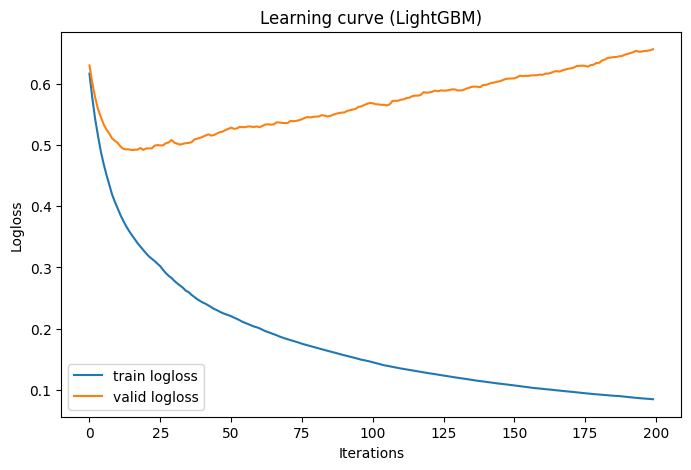

In [24]:
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt


target_column="Survived"
# Split
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_valid = valid_df.drop(columns=[target_column])
y_valid = valid_df[target_column]

# Encode cible
y_train_enc, le = ensure_binary_labels(y_train)
y_valid_enc = (
    pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
    if le else y_valid.astype(int)
)

# Align dtypes/cat
X_train, X_valid, cat_cols = align_categoricals_for_lgbm(X_train, X_valid)


model = LGBMClassifier(
    objective="binary",
    learning_rate=0.1,
    n_estimators=200,
    num_leaves=31,
    random_state=42,
)

# Fit avec suivi des métriques
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_metric="logloss"
    #verbose=False
)

# Récupération des résultats
results = model.evals_result_
print(results)

print(results.keys())

# Plot
plt.figure(figsize=(8, 5))
plt.plot(results["training"]["binary_logloss"], label="train logloss")
plt.plot(results["valid_1"]["binary_logloss"], label="valid logloss")
plt.xlabel("Iterations")
plt.ylabel("Logloss")
plt.title("Learning curve (LightGBM)")
plt.legend()
plt.show()

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

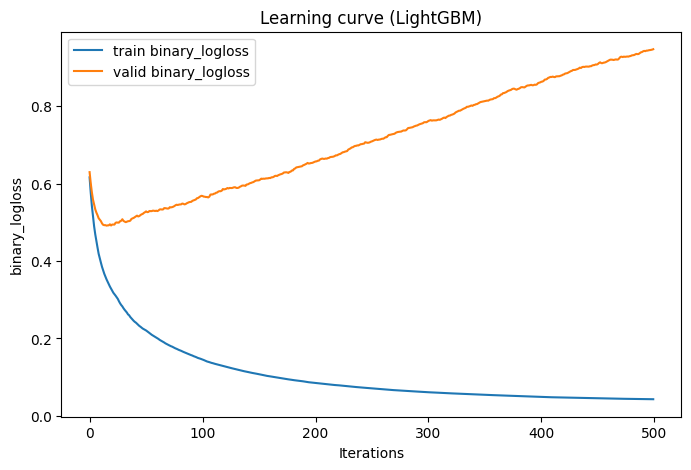

In [28]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import matplotlib.pyplot as plt
import pandas as pd

target_column = "Survived"

# --- Split
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_valid = valid_df.drop(columns=[target_column])
y_valid = valid_df[target_column]

# --- Encode cible
y_train_enc, le = ensure_binary_labels(y_train)
y_valid_enc = (
    pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
    if le else y_valid.astype(int)
)

# --- Align dtypes/cat
X_train, X_valid, cat_cols = align_categoricals_for_lgbm(X_train, X_valid)

# --- Modèle
model = LGBMClassifier(
    objective="binary",
    learning_rate=0.1,
    n_estimators=500,
    num_leaves=31,
    random_state=42,
)

# --- Fit avec suivi des métriques (train + valid)
#callbacks = [log_evaluation(period=50), early_stopping(stopping_rounds=50, verbose=False)]
model.fit(
    X_train, y_train_enc,
    eval_set=[(X_train, y_train_enc), (X_valid, y_valid_enc)],
    eval_metric="logloss",              # clé peut devenir 'binary_logloss' selon version
    categorical_feature=cat_cols if len(cat_cols) > 0 else "auto",
#    callbacks=callbacks,
)

# --- Récupération de l'historique
evals = model.evals_result_
print("Best iteration:", getattr(model, "best_iteration_", None))
print("Eval keys:", evals.keys())       # ex: dict_keys(['training', 'valid_1'])

# Trouver la clé de métrique de façon robuste
train_metrics = evals["training"]
metric_name = "binary_logloss" if "binary_logloss" in train_metrics else \
              ("logloss" if "logloss" in train_metrics else list(train_metrics.keys())[0])

# --- Plot learning curves
plt.figure(figsize=(8, 5))
plt.plot(evals["training"][metric_name], label=f"train {metric_name}")
plt.plot(evals["valid_1"][metric_name], label=f"valid {metric_name}")
plt.xlabel("Iterations")
plt.ylabel(metric_name)
plt.title("Learning curve (LightGBM)")
plt.legend()
plt.show()


Confusion matrix (labels=[0,1]):
 [[92 18]
 [20 49]]

Classification report:
               precision    recall  f1-score   support

           0     0.8214    0.8364    0.8288       110
           1     0.7313    0.7101    0.7206        69

    accuracy                         0.7877       179
   macro avg     0.7764    0.7733    0.7747       179
weighted avg     0.7867    0.7877    0.7871       179

ROC AUC: 0.8173
PR AUC (Average Precision): 0.7791
Threshold used: 0.50


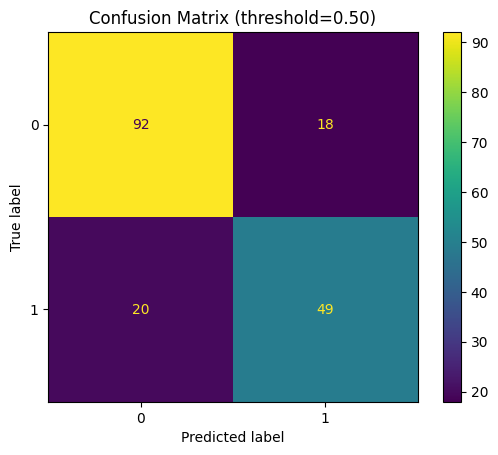

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_auc_score,
    average_precision_score,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)

target_column = "Survived"
threshold = 0.5  # ajuste si besoin

# --- Split X/y test
X_test_raw = valid_df.drop(columns=[target_column]).copy()
y_test_raw = valid_df[target_column]

# --- Encode y_test avec le label encoder utilisé au train (si présent)
y_test = (
    pd.Series(le.transform(y_test_raw), index=y_test_raw.index).astype(int)
    if le else y_test_raw.astype(int)
)

# --- Aligner les catégorielles du test sur celles du train
# Ici, on s'appuie sur X_train (déjà aligné avec le valid) pour transmettre les catégories
_, X_test, _ = align_categoricals_for_lgbm(X_train, X_test_raw)

# --- S'assurer du même ordre de colonnes que le train
X_test = X_test[X_train.columns]

# --- Prédictions
proba = model.predict_proba(X_test)[:, 1]
y_pred = (proba >= threshold).astype(int)

# --- Métriques numériques
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion matrix (labels=[0,1]):\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print(f"ROC AUC: {roc_auc_score(y_test, proba):.4f}")
print(f"PR AUC (Average Precision): {average_precision_score(y_test, proba):.4f}")
print(f"Threshold used: {threshold:.2f}")

# --- Plots
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot(values_format="d")
plt.title(f"Confusion Matrix (threshold={threshold:.2f})")
plt.show()


[LightGBM] [Info] Number of positive: 136, number of negative: 220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 356, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

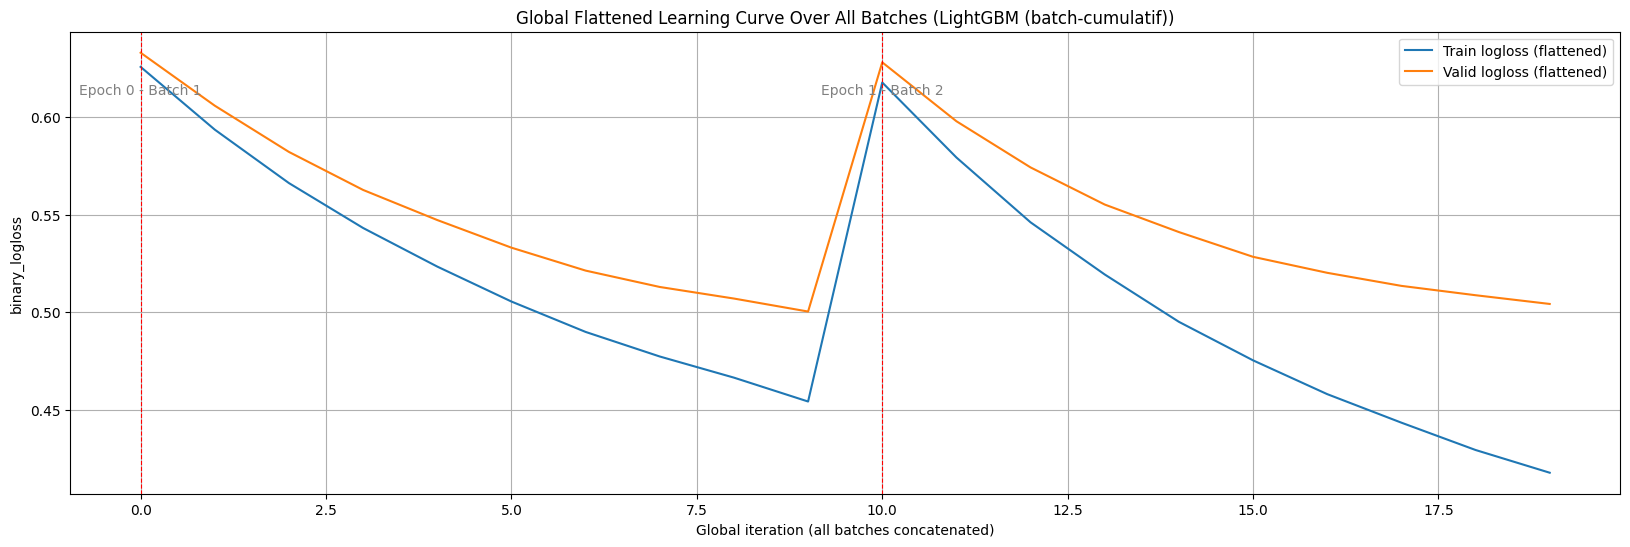

In [56]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.preprocessing import LabelEncoder

# ---------- Utils ----------
def ensure_binary_labels(y: pd.Series):
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Version binaire uniquement. Reçu {y.nunique()} classes.")
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index).astype(int)
    return yy, le

def make_batches(n, n_batches=5, seed=42, shuffle=True):
    idx = np.arange(n)
    if shuffle:
        rng = np.random.default_rng(seed)
        rng.shuffle(idx)
    return list(np.array_split(idx, n_batches))

def align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    Xtr, Xva = X_train.copy(), X_valid.copy()
    cat_cols = Xtr.select_dtypes(include=["object", "category"]).columns.tolist()

    for col in cat_cols:
        cats = pd.Categorical(Xtr[col]).categories
        Xtr[col] = pd.Categorical(Xtr[col], categories=cats)
        Xva[col] = pd.Categorical(Xva[col], categories=cats)

    bool_cols = Xtr.select_dtypes(include=["bool"]).columns.tolist()
    if len(bool_cols) > 0:
        Xtr[bool_cols] = Xtr[bool_cols].astype(int)
        Xva[bool_cols] = Xva[bool_cols].astype(int)

    Xva = Xva[Xtr.columns]
    return Xtr, Xva, cat_cols

# ---------- Fit batch ----------
def fit_lgbm_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    target_column: str,
    n_batches: int = 5,
    params: dict | None = None,
    random_state: int = 42,
    early_stopping_rounds: int | None = 50,
    log_eval_every: int = 50,
):
    """
    Entraîne un LGBMClassifier batch par batch (cumulatif).
    Retourne:
        model_last, global_train_loss, global_valid_loss, metric_name
    - global_*_loss : liste de listes (une liste par batch, valeur par itération)
    - metric_name : nom de la métrique dans evals_result_ (ex: 'binary_logloss')
    """
    # Split
    X_train = train_df.drop(columns=[target_column])
    y_train = train_df[target_column]
    X_valid = valid_df.drop(columns=[target_column])
    y_valid = valid_df[target_column]

    # Encode cible
    y_train_enc, le = ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
        if le else y_valid.astype(int)
    )

    # Align dtypes/cat
    X_train, X_valid, cat_cols = align_categoricals_for_lgbm(X_train, X_valid)

    # Batches cumulés
    batches_idx = make_batches(len(X_train), n_batches=n_batches, seed=random_state)

    # Params défaut
    if params is None:
        params = dict(
            objective="binary",
            learning_rate=0.05,
            n_estimators=2000,          # grand max; early stopping coupera
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.9,
            random_state=random_state,
        )

    cum_idx = np.array([], dtype=int)
    global_train_loss: list[list[float]] = []
    global_valid_loss: list[list[float]] = []
    metric_name = None
    model = None

    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])
        model = LGBMClassifier(**params)

        callbacks = []
        if early_stopping_rounds is not None and early_stopping_rounds > 0:
            callbacks.append(early_stopping(stopping_rounds=early_stopping_rounds, first_metric_only=True))
        if log_eval_every is not None and log_eval_every > 0:
            callbacks.append(log_evaluation(period=log_eval_every))

        model.fit(
            X_train.iloc[cum_idx],
            y_train_enc.iloc[cum_idx],
            eval_set=[(X_train.iloc[cum_idx], y_train_enc.iloc[cum_idx]), (X_valid, y_valid_enc)],
            eval_metric="logloss",  # laisser LightGBM nommer correctement (ex: 'binary_logloss')
            categorical_feature=cat_cols if len(cat_cols) > 0 else "auto",
            callbacks=callbacks if len(callbacks) > 0 else None,
        )

        evals = model.evals_result_
        #print(evals)
        # Récupère le nom de métrique de façon robuste
        # ex: evals = {'training': {'binary_logloss': [...]}, 'valid_1': {'binary_logloss': [...]} }
        train_metrics = evals.get("valid_0", {})
        metric_name = next(iter(train_metrics.keys())) if len(train_metrics) > 0 else "binary_logloss"

        print('Train:', evals["valid_0"][metric_name])
        print('Valid:', evals["valid_1"][metric_name])


        print('Len - Train:', len(evals["valid_0"][metric_name]))
        print('Len - Valid:', len(evals["valid_1"][metric_name]))
        
        global_train_loss.append(evals["valid_0"][metric_name])
        global_valid_loss.append(evals["valid_1"][metric_name])

    return model, global_train_loss, global_valid_loss, metric_name




model, global_train_loss, global_valid_loss, metric_name = fit_lgbm_in_batches(
    train_df=train_df,
    valid_df=valid_df,
    target_column="Survived",
    n_batches=2,
    params=dict(
        objective="binary",
        learning_rate=0.1,
        n_estimators=10,   # grand max, early stopping fera le job
        num_leaves=15,
        random_state=42,
    ),
    early_stopping_rounds=30,
    log_eval_every=100,
)

# ---- Plot des courbes par batch ----
import numpy as np
from matplotlib.pyplot import figure, plot, gca, title, xlabel, ylabel, legend, grid, show

# ---- Courbes "aplaties" + démarcations de batchs ----
flattened_train_loss = [loss for batch_curve in global_train_loss for loss in batch_curve]
flattened_val_loss   = [loss for batch_curve in global_valid_loss   for loss in batch_curve]

# indices de début de chaque batch dans la courbe aplatie (0, len(b1), len(b1)+len(b2), ...)
batch_start_indices = np.cumsum([0] + [len(curve) for curve in global_train_loss[:-1]])

# infos d’affichage
n_batches = len(global_train_loss)
global_iterations = list(range(1, n_batches + 1))  # [1, 2, ..., n_batches]
model_name = "LightGBM (batch-cumulatif)"
eval_metric = metric_name

figure(figsize=(20, 6))
plot(flattened_train_loss, label="Train logloss (flattened)")
plot(flattened_val_loss,   label="Valid logloss (flattened)")

ax1 = gca()
for idx, x in enumerate(batch_start_indices):
    # ligne verticale (garde celle à x=0 si tu veux matérialiser le tout début)
    ax1.axvline(x=x, color="red", linestyle="--", linewidth=0.8)

    # annotation
    ax1.text(
        x,
        ax1.get_ylim()[1] * 0.95,
        f"Epoch {idx} - Batch {global_iterations[idx]}",
        ha="center",
        fontsize=10,
        color="gray",
    )

title(f"Global Flattened Learning Curve Over All Batches ({model_name})")
xlabel("Global iteration (all batches concatenated)")
ylabel(eval_metric)
legend()
grid()
show()



In [ ]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, log_loss
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# ---------------- Utils ----------------
def ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Version binaire uniquement. Reçu {y.nunique()} classes.")
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index).astype(int)
    return yy, le

def make_batches(n, n_batches=5, seed=42, shuffle=True):
    idx = np.arange(n)
    if shuffle:
        rng = np.random.default_rng(seed)
        rng.shuffle(idx)
    return list(np.array_split(idx, n_batches))

def align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """
    Cast object/category -> category (aligne train/valid) + bool -> int.
    Retourne Xtr, Xva et la liste des colonnes catégorielles.
    """
    Xtr, Xva = X_train.copy(), X_valid.copy()

    # Object -> category et alignement des catégories
    cat_cols = Xtr.select_dtypes(include=["object", "category"]).columns.tolist()
    for col in cat_cols:
        cats = pd.Categorical(Xtr[col]).categories
        Xtr[col] = pd.Categorical(Xtr[col], categories=cats)
        Xva[col] = pd.Categorical(Xva[col], categories=cats)

    # Bool -> int
    bool_cols = Xtr.select_dtypes(include=["bool"]).columns.tolist()
    if len(bool_cols) > 0:
        Xtr[bool_cols] = Xtr[bool_cols].astype(int)
        Xva[bool_cols] = Xva[bool_cols].astype(int)

    # Même ordre de colonnes
    Xva = Xva[Xtr.columns]

    return Xtr, Xva, cat_cols

# ---------------- Fit batch ----------------
def fit_lgbm_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    target_column: str,
    n_batches: int = 5,
    params: dict | None = None,
    random_state: int = 42,
):
    """
    Entraîne un LGBMClassifier batch par batch (cumulatif) et retourne :
    {
        "reports": [dict par batch],
        "models": [modèles par batch],
        "best_idx": int,
        "best_report": dict,
        "best_model": LGBMClassifier,
        "label_encoder": LabelEncoder|None,
        "cat_cols": [str]
    }
    """
    # Split
    X_train = train_df.drop(columns=[target_column])
    y_train = train_df[target_column]
    X_valid = valid_df.drop(columns=[target_column])
    y_valid = valid_df[target_column]

    # Encode cible
    y_train_enc, le = ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
        if le else y_valid.astype(int)
    )

    # Align dtypes/cat
    X_train, X_valid, cat_cols = align_categoricals_for_lgbm(X_train, X_valid)

    # Batches
    batches_idx = make_batches(len(X_train), n_batches=n_batches, seed=random_state)

    # Params défaut
    if params is None:
        params = dict(
            objective="binary",
            learning_rate=0.05,
            n_estimators=200,
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.9,
            random_state=random_state,
        )

  
    cum_idx = np.array([], dtype=int)
    global_train_loss :list[list[float]] = None
    global_valid_loss :list[list[float]] = None

    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])

        model = LGBMClassifier(**params)

        model.fit(
            X_train.iloc[cum_idx],
            y_train_enc.iloc[cum_idx],
            eval_set=[(X_train.iloc[cum_idx],y_train_enc.iloc[cum_idx]),(X_valid, y_valid_enc)],
            eval_metric="logloss",
            categorical_feature=cat_cols if len(cat_cols) > 0 else "auto",
            #callbacks=callbacks,
        )


        evals = model.evals_result_
        print("Best iteration:", getattr(model, "best_iteration_", None))
        print("Eval keys:", evals.keys())       # ex: dict_keys(['training', 'valid_1'])

        # Trouver la clé de métrique de façon robuste
        train_metrics = evals["training"]
        metric_name = list(train_metrics.keys())[0]

        global_train_loss.append(evals["training"][metric_name])
        global_valid_loss.append(evals["valid_1"][metric_name])

    return model, global_train_loss, global_valid_loss, metric_name

# ---------------- Exemple d'appel (exécutable) ---------------- train_df,valid_df
model, global_train_loss, global_valid_loss, metric_name = fit_lgbm_in_batches(
    train_df=train_df,
    valid_df=valid_df,
    target_column="Survived",
    n_batches=2,
    params=dict(
        objective="binary",
        learning_rate=0.1,
        n_estimators=500,
        num_leaves=15,
        random_state=42,
    ),
    threshold=0.5,
    early_stopping_rounds=30,
    monitor="logloss",
)

plot global_train_loss, global_valid_loss, metric_name

[LightGBM] [Info] Number of positive: 136, number of negative: 220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 356, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Confusion matrix (labels=[0,1]):
 [[91 19]
 [20 49]]

Classification report:
               precision    recall  f1-score   support

           0     0.8198    0.8273    0.8235       110
           1     0.7206    0.7101    0.7153        69

    accuracy                         0.7821       179
   macro avg     0.7702    0.7687    0.7694       179
weighted avg     0.7816    0.7821    0.7818       179

ROC AUC: 0.8131
PR AUC (Average Precision): 0.7829
Threshold used: 0.50


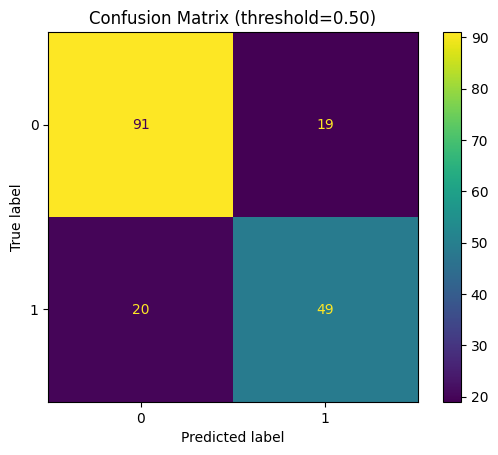

In [46]:
target_column = "Survived"
threshold = 0.5  # ajuste si besoin

# --- Split X/y test
X_test_raw = valid_df.drop(columns=[target_column]).copy()
y_test_raw = valid_df[target_column]

# --- Encode y_test avec le label encoder utilisé au train (si présent)
y_test = (
    pd.Series(le.transform(y_test_raw), index=y_test_raw.index).astype(int)
    if le else y_test_raw.astype(int)
)

# --- Aligner les catégorielles du test sur celles du train
# Ici, on s'appuie sur X_train (déjà aligné avec le valid) pour transmettre les catégories
_, X_test, _ = align_categoricals_for_lgbm(X_train, X_test_raw)

# --- S'assurer du même ordre de colonnes que le train
X_test = X_test[X_train.columns]

# --- Prédictions
proba = model.predict_proba(X_test)[:, 1]
y_pred = (proba >= threshold).astype(int)

# --- Métriques numériques
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion matrix (labels=[0,1]):\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print(f"ROC AUC: {roc_auc_score(y_test, proba):.4f}")
print(f"PR AUC (Average Precision): {average_precision_score(y_test, proba):.4f}")
print(f"Threshold used: {threshold:.2f}")

# --- Plots
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot(values_format="d")
plt.title(f"Confusion Matrix (threshold={threshold:.2f})")
plt.show()

In [9]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, log_loss
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# ---------------- Utils ----------------
def ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Version binaire uniquement. Reçu {y.nunique()} classes.")
    # déjà 0/1 ?
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index).astype(int)
    return yy, le

def make_batches(n, n_batches=5, seed=42, shuffle=True):
    idx = np.arange(n)
    if shuffle:
        rng = np.random.default_rng(seed)
        rng.shuffle(idx)
    return list(np.array_split(idx, n_batches))

def align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """
    Cast object/category -> category (aligne train/valid) + bool -> int.
    Retourne Xtr, Xva et la liste des colonnes catégorielles.
    """
    Xtr, Xva = X_train.copy(), X_valid.copy()

    # Object -> category et alignement des catégories
    cat_cols = Xtr.select_dtypes(include=["object", "category"]).columns.tolist()
    for col in cat_cols:
        cats = pd.Categorical(Xtr[col]).categories
        Xtr[col] = pd.Categorical(Xtr[col], categories=cats)
        Xva[col] = pd.Categorical(Xva[col], categories=cats)

    # Bool -> int (en dehors de la boucle)
    bool_cols = Xtr.select_dtypes(include=["bool"]).columns.tolist()
    if len(bool_cols) > 0:
        Xtr[bool_cols] = Xtr[bool_cols].astype(int)
        Xva[bool_cols] = Xva[bool_cols].astype(int)

    # S'assure des mêmes colonnes/ordre
    Xva = Xva[Xtr.columns]

    return Xtr, Xva, cat_cols

# ---------------- Fit batch ----------------
def fit_lgbm_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    target_column: str,
    n_batches: int = 5,
    params: dict | None = None,
    random_state: int = 42,
    threshold: float = 0.5,
    early_stopping_rounds: int | None = None,  # None = pas d'ES
    monitor: str = "logloss",  # clé de métrique pour choisir le best (logloss / auc)
):
    """
    Entraîne un LGBMClassifier batch par batch (cumulatif).
    Retourne un dict avec modèles, métriques par batch et meilleur modèle.

    monitor:
      - "logloss" (minimiser)
      - "auc" (maximiser)
    """
    # Split
    X_train = train_df.drop(columns=[target_column])
    y_train = train_df[target_column]
    X_valid = valid_df.drop(columns=[target_column])
    y_valid = valid_df[target_column]

    # Encode cible
    y_train_enc, le = ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
        if le else y_valid.astype(int)
    )

    # Align dtypes/cat
    X_train, X_valid, cat_cols = align_categoricals_for_lgbm(X_train, X_valid)

    # Batches
    batches_idx = make_batches(len(X_train), n_batches=n_batches, seed=random_state)

    # Params défaut
    if params is None:
        params = dict(
            objective="binary",
            learning_rate=0.05,
            n_estimators=200,
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.9,
            random_state=random_state,
        )

    results = {"reports": [], "models": [], "label_encoder": le, "cat_cols": cat_cols}
    cum_idx = np.array([], dtype=int)

    best_idx = None
    best_report = None

    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])

        model = LGBMClassifier(**params)

        fit_kwargs = dict(
            X=X_train.iloc[cum_idx],
            y=y_train_enc.iloc[cum_idx],
            eval_set=[(X_valid, y_valid_enc)],
            eval_metric="logloss",
            categorical_feature=cat_cols if len(cat_cols) > 0 else "auto",
        )
        if early_stopping_rounds is not None and early_stopping_rounds > 0:
            fit_kwargs["early_stopping_rounds"] = early_stopping_rounds

        model.fit(**fit_kwargs)

        # Prédictions valid
        proba = model.predict_proba(X_valid)[:, 1]
        y_pred = (proba >= threshold).astype(int)

        # Métriques
        report = {
            "batch": b,
            "n_cum_samples": int(len(cum_idx)),
            "logloss": float(log_loss(y_valid_enc, proba, labels=[0,1])),
            "auc": float(roc_auc_score(y_valid_enc, proba)),
            "accuracy": float(accuracy_score(y_valid_enc, y_pred)),
            "f1": float(f1_score(y_valid_enc, y_pred)),
            "threshold": float(threshold),
            "best_iteration": getattr(model, "best_iteration_", None),
            "n_estimators": params.get("n_estimators"),
        }

        results["reports"].append(report)
        results["models"].append(model)

        # Sélection du meilleur
        if best_idx is None:
            best_idx, best_report = b - 1, report
        else:
            if monitor == "logloss":
                if report["logloss"] < best_report["logloss"]:
                    best_idx, best_report = b - 1, report
            elif monitor == "auc":
                if report["auc"] > best_report["auc"]:
                    best_idx, best_report = b - 1, report
            else:
                raise ValueError("monitor must be 'logloss' or 'auc'.")

        # Petit log console (optionnel)
        print(
            f"[Batch {b}/{n_batches} | n={len(cum_idx)}] "
            f"val_logloss={report['logloss']:.4f} | val_auc={report['auc']:.4f} | "
            f"acc={report['accuracy']:.4f} | f1={report['f1']:.4f} | "
            f"best@{best_idx+1} ({monitor}={best_report[monitor]:.4f})"
        )

    results["best_idx"] = best_idx
    results["best_report"] = best_report
    results["best_model"] = results["models"][best_idx] if best_idx is not None else None
    return results

# ---------------- Exemple d'appel ----------------
results = fit_lgbm_in_batches(
    train_df=train_df,
    valid_df=valid_df,
    target_column="Survived",
    n_batches=3,
    params=dict(
        objective="binary",
        learning_rate=0.1,
        n_estimators=100,
        num_leaves=15,
        random_state=42,
    ),
    threshold=0.5,
    early_stopping_rounds=30,
    monitor="logloss",
)
print("\nRésumé du meilleur batch :")
print(results["best_report"])



TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, log_loss
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# ---------------- Utils ----------------
def ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Version binaire uniquement. Reçu {y.nunique()} classes.")
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index).astype(int)
    return yy, le

def make_batches(n, n_batches=5, seed=42, shuffle=True):
    idx = np.arange(n)
    if shuffle:
        rng = np.random.default_rng(seed)
        rng.shuffle(idx)
    return list(np.array_split(idx, n_batches))


def align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """Cast object/category -> category (align train/valid) + bool -> int."""
    Xtr, Xva = X_train.copy(), X_valid.copy()
    cat_cols = Xtr.select_dtypes(include=["object", "category"]).columns.tolist()
    for col in cat_cols:
        cats = pd.Categorical(Xtr[col]).categories
        Xtr[col] = pd.Categorical(Xtr[col], categories=cats)
        Xva[col] = pd.Categorical(Xva[col], categories=cats)
        bool_cols = Xtr.select_dtypes(include=["bool"]).columns
    if len(bool_cols) > 0:
        Xtr[bool_cols] = Xtr[bool_cols].astype(int)
        Xva[bool_cols] = Xva[bool_cols].astype(int)
    return Xtr, Xva, cat_cols

# ---------------- Fit batch ----------------
def fit_lgbm_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    target_column: str,
    n_batches: int = 5,
    params: dict | None = None,
    random_state: int = 42,
    threshold: float = 0.5,
):
    """
    Entraîne un LGBMClassifier batch par batch (cumulatif).
    Retourne dict avec modèles et métriques.
    """
    # Split
    X_train = train_df.drop(columns=[target_column])
    y_train = train_df[target_column]
    X_valid = valid_df.drop(columns=[target_column])
    y_valid = valid_df[target_column]

    # Encode cible
    y_train_enc, le = ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
        if le else y_valid.astype(int)
    )

X_train, X_valid, cat_cols = align_categoricals_for_lgbm(X_train, X_valid)
    # Batches
    batches_idx = make_batches(len(X_train), n_batches=n_batches, seed=random_state)

    # Params défaut
    if params is None:
        params = dict(
            objective="binary",
            learning_rate=0.05,
            n_estimators=200,
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.9,
            random_state=random_state,
        )

    results = {"reports": [], "models": [], "label_encoder": le}
    cum_idx = np.array([], dtype=int)

    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])

        model = LGBMClassifier(**params)
        model.fit(
            X_train.iloc[cum_idx],
            y_train_enc.iloc[cum_idx],
            eval_set=[(X_valid, y_valid_enc)],
            eval_metric="logloss",
            #early_stopping_rounds=30,
            #verbose=False,
        )



# Importer la fonction fit
results = fit_lgbm_in_batches(
    train_df=train_df, #train_df, valid_df
    valid_df=valid_df,
    target_column="Survived",
    n_batches=3,
    params=dict(
        objective="binary",
        learning_rate=0.1,
        n_estimators=100,
        num_leaves=15,
        random_state=42,
    ),
)

print("\nRésumé du meilleur batch :")
print(results["reports"][-1])

ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: Sex: object, Ticket: object, Cabin: object, Embarked: object

2025-09-08 17:33:46,867 - batchtrainingbooster.core.base_trainer - INFO - Validating input parameters
2025-09-08 17:33:46,932 - batchtrainingbooster.core.base_trainer - INFO - Preparing training data
2025-09-08 17:33:46,932 - batchtrainingbooster.core.base_trainer - INFO - Preparing validation data
2025-09-08 17:33:46,933 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for validation.


Importing CatBoostTrainer
===== Configuration CatBoost =====
{'loss_function': 'Logloss',
 'eval_metric': 'Logloss',
 'iterations': 100,
 'learning_rate': 0.01,
 'depth': 6,
 'l2_leaf_reg': 3.0,
 'auto_class_weights': 'Balanced',
 'bootstrap_type': 'Bernoulli',
 'subsample': 0.8,
 'random_seed': 42,
 'verbose': True,
 'early_stopping_rounds': 10}
Applying fit method


2025-09-08 17:33:48,305 - batchtrainingbooster.core.base_trainer - INFO - Categorical features detected in validation set
2025-09-08 17:33:48,306 - batchtrainingbooster.core.base_trainer - INFO - Number of categorical features identified: 4
2025-09-08 17:33:48,307 - batchtrainingbooster.core.base_trainer - INFO - Initializing training state for CatBoost
2025-09-08 17:33:48,307 - batchtrainingbooster.core.base_trainer - INFO - 🚀 Starting CatBoost training with 2 batches
2025-09-08 17:33:48,308 - batchtrainingbooster.core.base_trainer - INFO - Starting to process DataFrame in batches...
2025-09-08 17:33:48,308 - batchtrainingbooster.core.base_trainer - INFO - Creating batches...
2025-09-08 17:33:48,437 - batchtrainingbooster.core.base_trainer - INFO - Created 2 batches stratified by Survived
2025-09-08 17:33:48,438 - batchtrainingbooster.core.base_trainer - INFO - Batches created successfully.
2025-09-08 17:33:48,438 - batchtrainingbooster.core.base_trainer - INFO - Batches created and a

0:	learn: 0.6903832	test: 0.6905148	test1: 0.6909352	best: 0.6909352 (0)	total: 2.04ms	remaining: 202ms
1:	learn: 0.6872507	test: 0.6873820	test1: 0.6882021	best: 0.6882021 (1)	total: 2.66ms	remaining: 130ms
2:	learn: 0.6841130	test: 0.6842440	test1: 0.6854275	best: 0.6854275 (2)	total: 4.67ms	remaining: 151ms
3:	learn: 0.6810632	test: 0.6811937	test1: 0.6827697	best: 0.6827697 (3)	total: 5.69ms	remaining: 136ms
4:	learn: 0.6780508	test: 0.6781925	test1: 0.6800808	best: 0.6800808 (4)	total: 6.69ms	remaining: 127ms
5:	learn: 0.6751175	test: 0.6752975	test1: 0.6776233	best: 0.6776233 (5)	total: 7.52ms	remaining: 118ms
6:	learn: 0.6726204	test: 0.6727710	test1: 0.6755443	best: 0.6755443 (6)	total: 8.26ms	remaining: 110ms
7:	learn: 0.6697899	test: 0.6699405	test1: 0.6730768	best: 0.6730768 (7)	total: 8.7ms	remaining: 100ms
8:	learn: 0.6670604	test: 0.6671735	test1: 0.6708985	best: 0.6708985 (8)	total: 9.33ms	remaining: 94.4ms
9:	learn: 0.6645903	test: 0.6646150	test1: 0.6686601	best: 0.668

2025-09-08 17:33:50,626 - batchtrainingbooster.core.base_trainer - INFO - 📦 Processing batch 2/2
2025-09-08 17:33:50,627 - batchtrainingbooster.core.base_trainer - INFO - 🏋️ Training CatBoost model on batch 2/2
2025-09-08 17:33:50,698 - batchtrainingbooster.core.base_trainer - INFO - ✅ Model trained on batch 2/2
2025-09-08 17:33:50,699 - batchtrainingbooster.core.base_trainer - INFO - Batch 2 - Train: 0.46579 | Valid: 0.53052
2025-09-08 17:33:50,700 - batchtrainingbooster.core.base_trainer - INFO - 🎉 New best model found with Valid Loss: 0.53052 (improvement: 0.02381)
2025-09-08 17:33:50,701 - batchtrainingbooster.core.base_trainer - INFO - Plotting learning curve of CatBoost model...


0:	learn: 0.5426633	test: 0.5426202	test1: 0.5543634	best: 0.5543634 (0)	total: 922us	remaining: 91.3ms
1:	learn: 0.5416353	test: 0.5419264	test1: 0.5537480	best: 0.5537480 (1)	total: 1.73ms	remaining: 85ms
2:	learn: 0.5405182	test: 0.5408084	test1: 0.5529273	best: 0.5529273 (2)	total: 2.23ms	remaining: 72.3ms
3:	learn: 0.5395048	test: 0.5397558	test1: 0.5526232	best: 0.5526232 (3)	total: 2.72ms	remaining: 65.3ms
4:	learn: 0.5387460	test: 0.5392931	test1: 0.5521705	best: 0.5521705 (4)	total: 3.22ms	remaining: 61.2ms
5:	learn: 0.5378096	test: 0.5388057	test1: 0.5521195	best: 0.5521195 (5)	total: 3.5ms	remaining: 54.9ms
6:	learn: 0.5370104	test: 0.5383980	test1: 0.5520310	best: 0.5520310 (6)	total: 4.14ms	remaining: 55ms
7:	learn: 0.5365018	test: 0.5378089	test1: 0.5518345	best: 0.5518345 (7)	total: 4.32ms	remaining: 49.7ms
8:	learn: 0.5357556	test: 0.5370502	test1: 0.5514178	best: 0.5514178 (8)	total: 4.84ms	remaining: 49ms
9:	learn: 0.5349026	test: 0.5361140	test1: 0.5509812	best: 0.55

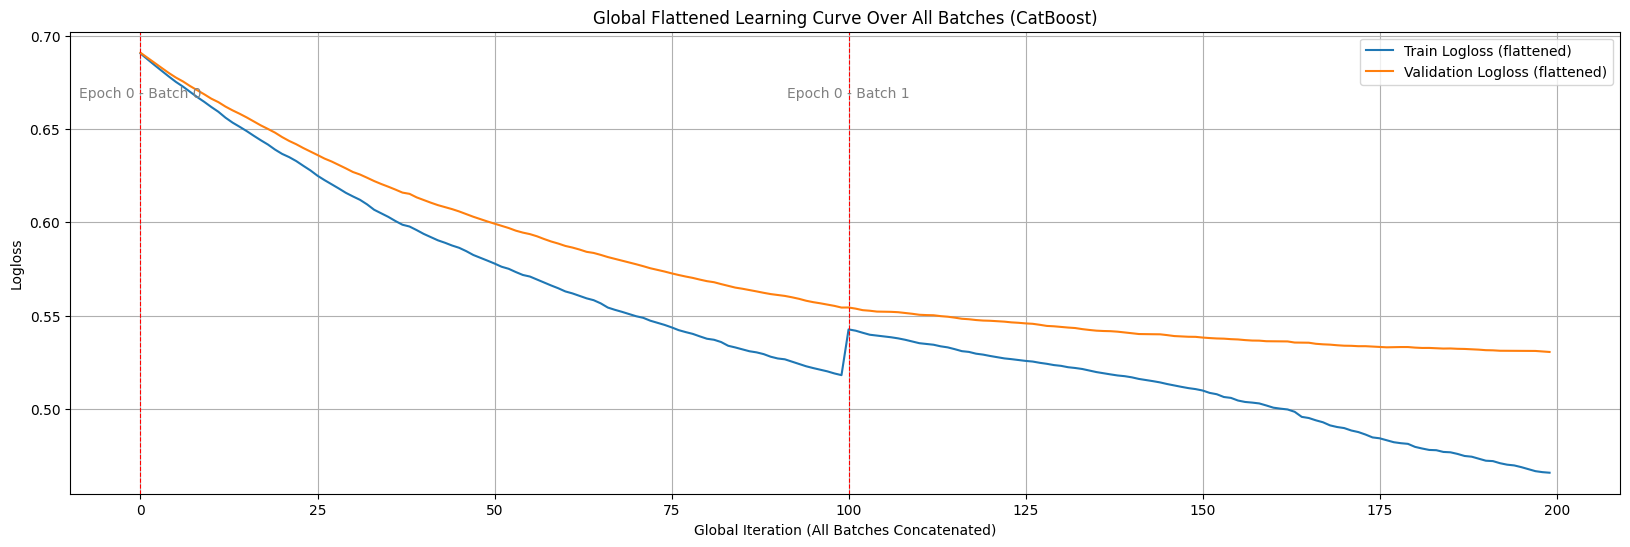

2025-09-08 17:33:50,928 - batchtrainingbooster.core.base_trainer - INFO - Learning curve plotted successfully.
2025-09-08 17:33:50,929 - batchtrainingbooster.core.base_trainer - INFO - CatBoost training completed successfully!
2025-09-08 17:33:50,929 - batchtrainingbooster.core.base_trainer - INFO - Total batches processed: 2
2025-09-08 17:33:50,930 - batchtrainingbooster.core.base_trainer - INFO - Best validation loss: 0.53052
2025-09-08 17:33:50,930 - batchtrainingbooster.core.base_trainer - INFO - Using best model
2025-09-08 17:33:50,931 - batchtrainingbooster.core.base_trainer - INFO - Categorical features used: 4


In [7]:
# Définition de la colonne cible
target_column = "Survived"

# Instanciation du trainer
print("Importing CatBoostTrainer")
trainer = CatBoostTrainer()
# print("CatBoostTrainer imported and instantiated successfully:", trainer)


# Binary class
config_model = {
    "loss_function": "Logloss",      # fonction de perte binaire
    "eval_metric": "Logloss",        # métrique d’évaluation choisie
    "iterations": 100,
    "learning_rate": 0.01,
    "depth": 6,
    "l2_leaf_reg": 3.0,
    "auto_class_weights": "Balanced",  # utile si classes déséquilibrées
    "bootstrap_type": "Bernoulli",
    "subsample": 0.8,
    "random_seed": 42,
    "verbose": True,
    "early_stopping_rounds": 10,
    #"use_best_model": True,
}

config_training = {
    "num_batches": 2,  # nombre de lots pour l'entraînement
    "max_patience": 5,  # patience pour early stopping global
    "show_learning_curve": True,  # afficher la courbe d'apprentissage
}

print("===== Configuration CatBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

print("Applying fit method")
trainer.fit(
    train_dataframe=spark_train_df,
    valid_dataframe=spark_valid_df,
    target_column=target_column,
    config_training=config_training,
    config_model=config_model,
)

2025-09-08 17:33:53,719 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for validation.


Importing XGBoostTrainer
XGBoostTrainer imported and instantiated successfully: <batchtrainingbooster.trainers.xgboost_trainer.XGBoostTrainer object at 0x120ff0510>
===== Configuration XGBoost =====
{'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'n_estimators': 300,
 'learning_rate': 0.05,
 'max_depth': 6,
 'reg_lambda': 3.0,
 'subsample': 0.8,
 'colsample_bytree': 0.8,
 'random_state': 42,
 'early_stopping_rounds': 10}
Applying fit method


2025-09-08 17:33:54,339 - batchtrainingbooster.core.base_trainer - INFO - Categorical features detected - Enabling categorical support
2025-09-08 17:33:54,340 - batchtrainingbooster.core.base_trainer - INFO - 🚀 Starting XGBoost training with 3 batches
2025-09-08 17:33:54,341 - batchtrainingbooster.core.base_trainer - INFO - Starting to process DataFrame in batches...
2025-09-08 17:33:54,341 - batchtrainingbooster.core.base_trainer - INFO - Creating batches...
2025-09-08 17:33:54,620 - batchtrainingbooster.core.base_trainer - INFO - Created 3 batches stratified by Survived
2025-09-08 17:33:54,621 - batchtrainingbooster.core.base_trainer - INFO - Batches created successfully.
2025-09-08 17:33:54,622 - batchtrainingbooster.core.base_trainer - INFO - Batches created and applied to DataFrame.
2025-09-08 17:33:54,623 - batchtrainingbooster.core.base_trainer - INFO - Filtering and processing batch 0
2025-09-08 17:33:54,662 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark Dat

[0]	validation_0-logloss:0.65058	validation_1-logloss:0.67692
[1]	validation_0-logloss:0.61716	validation_1-logloss:0.66398
[2]	validation_0-logloss:0.58715	validation_1-logloss:0.65532
[3]	validation_0-logloss:0.56606	validation_1-logloss:0.64561
[4]	validation_0-logloss:0.54080	validation_1-logloss:0.63395
[5]	validation_0-logloss:0.52021	validation_1-logloss:0.62463
[6]	validation_0-logloss:0.49922	validation_1-logloss:0.61585
[7]	validation_0-logloss:0.48222	validation_1-logloss:0.60188
[8]	validation_0-logloss:0.46661	validation_1-logloss:0.59952
[9]	validation_0-logloss:0.45164	validation_1-logloss:0.59392
[10]	validation_0-logloss:0.44330	validation_1-logloss:0.58959
[11]	validation_0-logloss:0.43253	validation_1-logloss:0.58601
[12]	validation_0-logloss:0.41929	validation_1-logloss:0.57655
[13]	validation_0-logloss:0.40921	validation_1-logloss:0.57233
[14]	validation_0-logloss:0.40082	validation_1-logloss:0.56443
[15]	validation_0-logloss:0.39169	validation_1-logloss:0.55855
[1

2025-09-08 17:33:56,012 - batchtrainingbooster.core.base_trainer - INFO - Batch 1 - Train: 0.20897 | Valid: 0.51020
2025-09-08 17:33:56,015 - batchtrainingbooster.core.base_trainer - INFO - New best validation loss: 0.51020 (improvement: inf)
2025-09-08 17:33:56,019 - batchtrainingbooster.core.base_trainer - INFO - Filtering and processing batch 1
2025-09-08 17:33:56,057 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for batch 1
2025-09-08 17:33:56,954 - batchtrainingbooster.core.base_trainer - INFO - Processing batch 2/3
2025-09-08 17:33:56,955 - batchtrainingbooster.core.base_trainer - INFO - Calculating sample weights for batch 2
2025-09-08 17:33:56,962 - batchtrainingbooster.core.base_trainer - INFO - Learning rate for batch 2: 0.020000
2025-09-08 17:33:56,964 - batchtrainingbooster.core.base_trainer - INFO - 🏋️ Training XGBoost on batch 2


[0]	validation_0-logloss:0.50632	validation_1-logloss:0.50777
[1]	validation_0-logloss:0.50412	validation_1-logloss:0.50765
[2]	validation_0-logloss:0.50145	validation_1-logloss:0.50766
[3]	validation_0-logloss:0.49877	validation_1-logloss:0.50741
[4]	validation_0-logloss:0.49625	validation_1-logloss:0.50703
[5]	validation_0-logloss:0.49457	validation_1-logloss:0.50667
[6]	validation_0-logloss:0.49213	validation_1-logloss:0.50672
[7]	validation_0-logloss:0.49056	validation_1-logloss:0.50647
[8]	validation_0-logloss:0.48817	validation_1-logloss:0.50655
[9]	validation_0-logloss:0.48585	validation_1-logloss:0.50712
[10]	validation_0-logloss:0.48331	validation_1-logloss:0.50591
[11]	validation_0-logloss:0.48104	validation_1-logloss:0.50508
[12]	validation_0-logloss:0.47826	validation_1-logloss:0.50458
[13]	validation_0-logloss:0.47659	validation_1-logloss:0.50426
[14]	validation_0-logloss:0.47481	validation_1-logloss:0.50406
[15]	validation_0-logloss:0.47269	validation_1-logloss:0.50375
[1

2025-09-08 17:33:57,156 - batchtrainingbooster.core.base_trainer - INFO - Batch 2 - Train: 0.43466 | Valid: 0.50125
2025-09-08 17:33:57,163 - batchtrainingbooster.core.base_trainer - INFO - New best validation loss: 0.50125 (improvement: 0.00896)
2025-09-08 17:33:57,170 - batchtrainingbooster.core.base_trainer - INFO - Filtering and processing batch 2
2025-09-08 17:33:57,209 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for batch 2
2025-09-08 17:33:58,111 - batchtrainingbooster.core.base_trainer - INFO - Processing batch 3/3
2025-09-08 17:33:58,112 - batchtrainingbooster.core.base_trainer - INFO - Calculating sample weights for batch 3
2025-09-08 17:33:58,118 - batchtrainingbooster.core.base_trainer - INFO - Learning rate for batch 3: 0.004000
2025-09-08 17:33:58,119 - batchtrainingbooster.core.base_trainer - INFO - 🏋️ Training XGBoost on batch 3


[0]	validation_0-logloss:0.46312	validation_1-logloss:0.50299
[1]	validation_0-logloss:0.46261	validation_1-logloss:0.50336
[2]	validation_0-logloss:0.46204	validation_1-logloss:0.50378
[3]	validation_0-logloss:0.46146	validation_1-logloss:0.50414
[4]	validation_0-logloss:0.46097	validation_1-logloss:0.50453
[5]	validation_0-logloss:0.46041	validation_1-logloss:0.50494
[6]	validation_0-logloss:0.46000	validation_1-logloss:0.50496
[7]	validation_0-logloss:0.45949	validation_1-logloss:0.50533
[8]	validation_0-logloss:0.45897	validation_1-logloss:0.50573
[9]	validation_0-logloss:0.45843	validation_1-logloss:0.50615
[10]	validation_0-logloss:0.45787	validation_1-logloss:0.50666


2025-09-08 17:33:58,170 - batchtrainingbooster.core.base_trainer - INFO - Batch 3 - Train: 0.45787 | Valid: 0.50666
2025-09-08 17:33:58,174 - batchtrainingbooster.core.base_trainer - INFO - ⏳ No improvement - Patience: 1/5


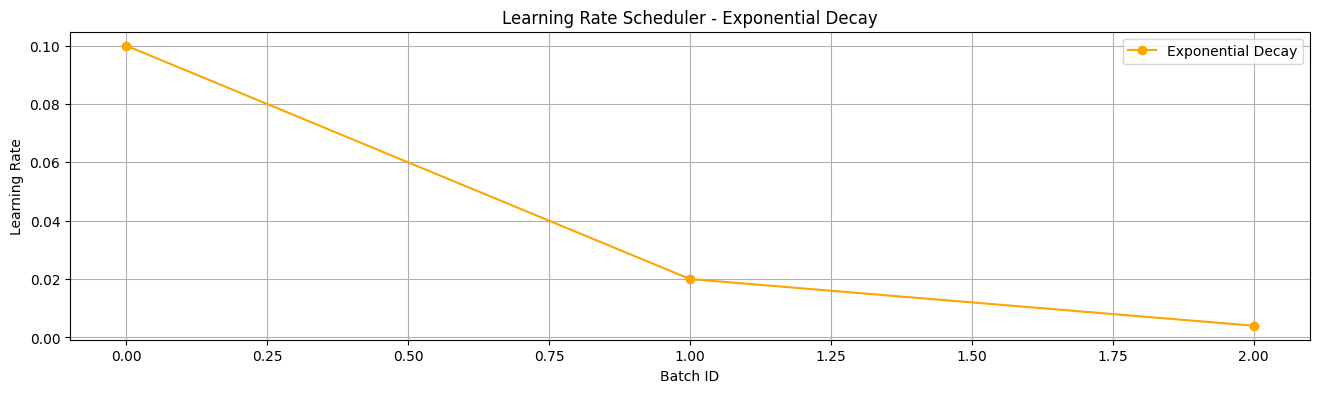

2025-09-08 17:33:58,280 - batchtrainingbooster.core.base_trainer - INFO - Plotting learning curve of XGBoost model...


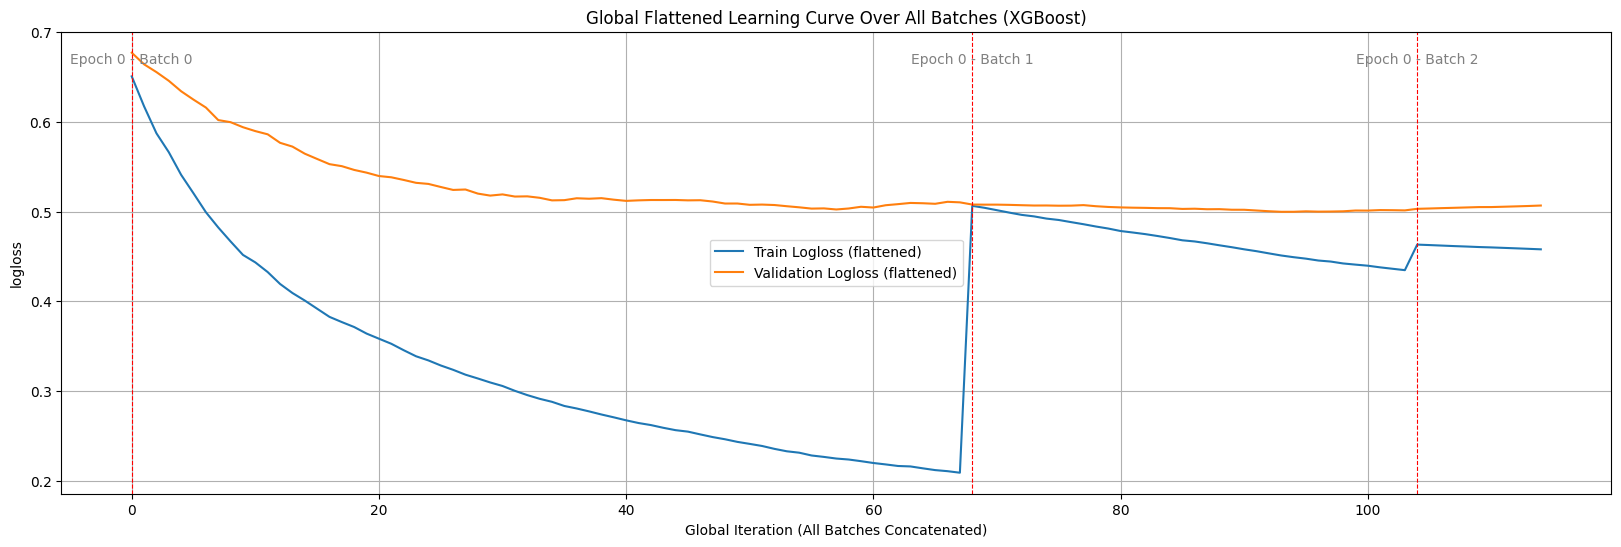

2025-09-08 17:33:58,397 - batchtrainingbooster.core.base_trainer - INFO - Learning curve plotted successfully.
2025-09-08 17:33:58,398 - batchtrainingbooster.core.base_trainer - INFO - Training completed successfully!
2025-09-08 17:33:58,398 - batchtrainingbooster.core.base_trainer - INFO - Total batches processed: 3
2025-09-08 17:33:58,399 - batchtrainingbooster.core.base_trainer - INFO - Best validation loss: 0.50125
2025-09-08 17:33:58,399 - batchtrainingbooster.core.base_trainer - INFO - Using best model


In [8]:
print("Importing XGBoostTrainer")
trainer = XGBoostTrainer()
print("XGBoostTrainer imported and instantiated successfully:", trainer)

target_column = "Survived"

# Binaire
config_model = {
    "objective": "binary:logistic",   # classification binaire #binary:logitraw #binary:logistic 
    "eval_metric": "logloss", #["auc", "logloss"],  # suivre AUC et logloss
    "n_estimators": 300,              # équivalent à iterations
    "learning_rate": 0.05,
    "max_depth": 6,
    "reg_lambda": 3.0,                # l2_leaf_reg -> reg_lambda
    "subsample": 0.8,
    "colsample_bytree": 0.8,          # sous-échantillonnage des features
    "random_state": 42,
    #"verbosity": 1,                   # 0 = silent, 1 = warnings
    #"verbose": 10,                   # 0 = silent, 1 = warnings
    "early_stopping_rounds": 10,      # géré via fit()
}

config_lr_scheduler = {
    "initial_lr": 0.1,
    "decay_rate": 0.20,
}

config_training = {
    "num_batches": 3,  # nombre de lots pour l'entraînement
    "max_patience": 5,  # patience pour early stopping global
    "show_learning_curve": True,  # afficher la courbe d'apprentissage
}

print("===== Configuration XGBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

print("Applying fit method")
trainer.fit(
    train_dataframe=spark_train_df,
    valid_dataframe=spark_valid_df,
    target_column=target_column,
    config_training = config_training,
    config_model=config_model,
    config_lr_scheduler=config_lr_scheduler,
)


In [9]:
# Récupérer la session Spark active
spark = spark_train_df.sparkSession

# Stopper Spark
stop_spark_session(spark)

[SPARK] Stopping Spark session...
[SPARK] Session stopped successfully.


In [8]:
import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score, log_loss
)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


def _ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Cette version est binaire. Reçu {y.nunique()} classes.")
    if set(y.unique()) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index)
    return yy, le


def train_lgbm_binary_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    label_col: str,
    n_batches: int = 5,
    num_boost_round: int = 300,
    early_stopping_rounds: int = 50,
    random_state: int = 42,
    lgb_params: dict | None = None,
):
    """
    Entraînement LightGBM binaire en batches cumulés, avec logs de métriques par batch.
    Retourne un dict { 'reports': [...], 'models': [...], 'label_encoder': le }.
    """
    # --- split X / y
    X_train = train_df.drop(columns=[label_col])
    y_train = train_df[label_col]
    X_valid = valid_df.drop(columns=[label_col])
    y_valid = valid_df[label_col]

    # --- encoder binaire
    y_train_enc, le = _ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index)
        if le is not None else y_valid.astype(int)
    )

    # --- params de base
    params = {
        "objective": "binary",
        "metric": ["binary_logloss", "auc"],
        "learning_rate": 0.05,
        "num_leaves": 31,
        "feature_fraction": 0.9,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
        "seed": random_state,
    }
    if lgb_params:
        params.update(lgb_params)

    # --- créer les batches (on mélange pour debug lisible mais reproductible)
    rng = np.random.default_rng(random_state)
    idx = np.arange(len(X_train))
    rng.shuffle(idx)
    batches_idx = np.array_split(idx, n_batches)

    results = {"reports": [], "models": [], "label_encoder": le}

    cum_idx = np.array([], dtype=int)
    print("=== DÉBUT: entraînement binaire par batches ===")
    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])

        train_data = lgb.Dataset(
            X_train.iloc[cum_idx],
            label=y_train_enc.iloc[cum_idx]
        )
        valid_data = lgb.Dataset(X_valid, label=y_valid_enc, reference=train_data)

        evals_result = {}
        model = lgb.train(
            params,
            train_data,
            valid_sets=[train_data, valid_data],
            valid_names=["train", "valid"],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds, verbose=False),
                lgb.record_evaluation(evals_result),
            ],
        )

        # --- prédictions & métriques
        proba_valid = model.predict(X_valid)
        proba_train = model.predict(X_train.iloc[cum_idx])

        pred_valid = (proba_valid >= 0.5).astype(int)
        pred_train = (proba_train >= 0.5).astype(int)

        # robustesse si AUC impossible (y_valid constant)
        try:
            auc_v = float(roc_auc_score(y_valid_enc, proba_valid))
        except Exception:
            auc_v = np.nan

        report = {
            "batch": b,
            "cumulative_samples": int(len(cum_idx)),
            "best_iteration": int(model.best_iteration),
            "metrics": {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0, 1])),
                "auc_valid": auc_v,
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),

                "accuracy_train": float(accuracy_score(y_train_enc.iloc[cum_idx], pred_train)),
                "f1_train": float(f1_score(y_train_enc.iloc[cum_idx], pred_train, average="binary")),
            },
            "evals_result": evals_result,
        }
        results["reports"].append(report)
        results["models"].append(model)

        # --- logs console minimalistes
        m = report["metrics"]
        print(f"[Batch {b}/{len(batches_idx)}] n_cum={report['cumulative_samples']}, "
              f"best_iter={report['best_iteration']}, "
              f"logloss_v={m['logloss_valid']:.4f}, auc_v={m['auc_valid']:.4f}, "
              f"acc_v={m['accuracy_valid']:.4f}, f1_v={m['f1_valid']:.4f}")

    # petit résumé final
    def key_auc_then_acc(r):  # maximise AUC puis accuracy
        return (-(r["metrics"]["auc_valid"] if not np.isnan(r["metrics"]["auc_valid"]) else -1e9),
                -r["metrics"]["accuracy_valid"])
    best = sorted(results["reports"], key=key_auc_then_acc)[0]
    print(f"\n🏁 Terminé. Meilleur batch = {best['batch']} (AUC={best['metrics']['auc_valid']:.4f}, "
          f"Acc={best['metrics']['accuracy_valid']:.4f})")

    return results



# Exemple d’appel (en supposant que vos DataFrames existent déjà)
target_column = "Survived"
res = train_lgbm_binary_in_batches(
    train_df=train_df,
    valid_df=valid_df,
    label_col=target_column,
    n_batches=5,
    num_boost_round=200,
    early_stopping_rounds=30,
)

# Récupérer le dernier modèle entraîné (après le dernier batch)
last_model = res["models"][-1]

# Voir les métriques par batch
for r in res["reports"]:
    print(r["batch"], r["cumulative_samples"], r["metrics"])


=== DÉBUT: entraînement binaire par batches ===


ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: Sex: object, Ticket: object, Cabin: object, Embarked: object

In [12]:
import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score, log_loss
)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


def _ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Cette version est binaire. Reçu {y.nunique()} classes.")
    # déjà 0/1 ?
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index)
    return yy.astype(int), le


def _align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """
    Convertit les colonnes object/category en category et aligne les catégories
    entre train et valid. Convertit les bool en int. Retourne (X_train, X_valid, cat_cols).
    """
    X_train = X_train.copy()
    X_valid = X_valid.copy()

    # colonnes catégorielles (object ou category)
    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

    # Aligner les catégories entre train et valid
    for col in cat_cols:
        cats = pd.Categorical(X_train[col]).categories  # catégories apprises sur le train
        X_train[col] = pd.Categorical(X_train[col], categories=cats)
        X_valid[col] = pd.Categorical(X_valid[col], categories=cats)  # inconnues -> NaN

    # bool -> int (LightGBM accepte bool, mais on uniformise)
    bool_cols = X_train.select_dtypes(include=["bool"]).columns
    if len(bool_cols) > 0:
        X_train[bool_cols] = X_train[bool_cols].astype(int)
        X_valid[bool_cols] = X_valid[bool_cols].astype(int)

    return X_train, X_valid, cat_cols


def train_lgbm_binary_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    label_col: str,
    n_batches: int = 5,
    num_boost_round: int = 300,
    early_stopping_rounds: int = 50,
    random_state: int = 42,
    lgb_params: dict | None = None,
):
    """
    Entraînement LightGBM binaire en batches cumulés, avec logs de métriques par batch.
    Retourne un dict { 'reports': [...], 'models': [...], 'label_encoder': le }.
    """
    # --- split X / y
    X_train = train_df.drop(columns=[label_col])
    y_train = train_df[label_col]
    X_valid = valid_df.drop(columns=[label_col])
    y_valid = valid_df[label_col]

    # --- encoder labels en {0,1}
    y_train_enc, le = _ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
        if le is not None else y_valid.astype(int)
    )

    # --- préparer features pour LightGBM (catégorielles/booleans)
    X_train, X_valid, cat_cols = _align_categoricals_for_lgbm(X_train, X_valid)

    # --- params de base LightGBM
    params = {
        "objective": "binary",
        "metric": ["binary_logloss", "auc"],
        "learning_rate": 0.05,
        "num_leaves": 31,
        "feature_fraction": 0.9,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
        "seed": random_state,
    }
    if lgb_params:
        params.update(lgb_params)

    # --- créer les batches (shuffle reproductible)
    rng = np.random.default_rng(random_state)
    idx = np.arange(len(X_train))
    rng.shuffle(idx)
    batches_idx = np.array_split(idx, n_batches)

    results = {"reports": [], "models": [], "label_encoder": le}

    cum_idx = np.array([], dtype=int)
    print("=== DÉBUT: entraînement binaire par batches ===")
    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])

        train_data = lgb.Dataset(
            X_train.iloc[cum_idx],
            label=y_train_enc.iloc[cum_idx],
            categorical_feature=cat_cols
        )
        valid_data = lgb.Dataset(
            X_valid,
            label=y_valid_enc,
            reference=train_data,
            categorical_feature=cat_cols
        )

        evals_result = {}
        model = lgb.train(
            params,
            train_data,
            valid_sets=[train_data, valid_data],
            valid_names=["train", "valid"],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds, verbose=False),
                lgb.record_evaluation(evals_result),
            ],
        )

        # --- prédictions & métriques
        proba_valid = model.predict(X_valid, num_iteration=model.best_iteration)
        proba_train = model.predict(X_train.iloc[cum_idx], num_iteration=model.best_iteration)

        pred_valid = (proba_valid >= 0.5).astype(int)
        pred_train = (proba_train >= 0.5).astype(int)

        # robustesse si AUC impossible (y_valid constant)
        try:
            auc_v = float(roc_auc_score(y_valid_enc, proba_valid))
        except Exception:
            auc_v = np.nan

        report = {
            "batch": b,
            "cumulative_samples": int(len(cum_idx)),
            "best_iteration": int(model.best_iteration),
            "metrics": {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0, 1])),
                "auc_valid": auc_v,
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
                "accuracy_train": float(accuracy_score(y_train_enc.iloc[cum_idx], pred_train)),
                "f1_train": float(f1_score(y_train_enc.iloc[cum_idx], pred_train, average="binary")),
            },
            "evals_result": evals_result,
        }
        results["reports"].append(report)
        results["models"].append(model)

        # logs console
        m = report["metrics"]
        print(f"[Batch {b}/{len(batches_idx)}] n_cum={report['cumulative_samples']}, "
              f"best_iter={report['best_iteration']}, "
              f"logloss_v={m['logloss_valid']:.4f}, auc_v={m['auc_valid']:.4f}, "
              f"acc_v={m['accuracy_valid']:.4f}, f1_v={m['f1_valid']:.4f}")

    # Meilleur batch = maximise AUC puis accuracy
    def key_auc_then_acc(r):
        auc = r["metrics"]["auc_valid"]
        return (-(auc if not np.isnan(auc) else -1e9), -r["metrics"]["accuracy_valid"])

    best = sorted(results["reports"], key=key_auc_then_acc)[0]
    print(f"\n🏁 Terminé. Meilleur batch = {best['batch']} (AUC={best['metrics']['auc_valid']:.4f}, "
          f"Acc={best['metrics']['accuracy_valid']:.4f})")

    return results


# ----------- Exemple d'utilisation -----------
target_column = "Survived"
res = train_lgbm_binary_in_batches(
     train_df=train_df,
     valid_df=valid_df,
     label_col=target_column,
     n_batches=5,
     num_boost_round=200,
     early_stopping_rounds=30,
 )
last_model = res["models"][-1]
for r in res["reports"]:
     print(r["batch"], r["cumulative_samples"], r["metrics"])



=== DÉBUT: entraînement binaire par batches ===
[Batch 1/5] n_cum=143, best_iter=76, logloss_v=0.4986, auc_v=0.8229, acc_v=0.7877, f1_v=0.7031
[Batch 2/5] n_cum=286, best_iter=12, logloss_v=0.5364, auc_v=0.8346, acc_v=0.7989, f1_v=0.6786
[Batch 3/5] n_cum=428, best_iter=17, logloss_v=0.5100, auc_v=0.8391, acc_v=0.7877, f1_v=0.6545
[Batch 4/5] n_cum=570, best_iter=10, logloss_v=0.5394, auc_v=0.8392, acc_v=0.7765, f1_v=0.6296
[Batch 5/5] n_cum=712, best_iter=11, logloss_v=0.5290, auc_v=0.8422, acc_v=0.7765, f1_v=0.6296

🏁 Terminé. Meilleur batch = 5 (AUC=0.8422, Acc=0.7765)
1 143 {'logloss_valid': 0.4986028340279914, 'auc_valid': 0.8229249011857707, 'accuracy_valid': 0.7877094972067039, 'f1_valid': 0.703125, 'accuracy_train': 0.8531468531468531, 'f1_train': 0.7878787878787878}
2 286 {'logloss_valid': 0.5364295341282372, 'auc_valid': 0.8345849802371541, 'accuracy_valid': 0.7988826815642458, 'f1_valid': 0.6785714285714286, 'accuracy_train': 0.8111888111888111, 'f1_train': 0.682352941176470

=== DÉBUT: entraînement binaire par batches ===
[Batch 1/3] n_cum=238, best_iter=9, logloss_v=0.5625, auc_v=0.8300, acc_v=0.7765, f1_v=0.6078
[Batch 2/3] n_cum=475, best_iter=60, logloss_v=0.4741, auc_v=0.8336, acc_v=0.8045, f1_v=0.7154
[Batch 3/3] n_cum=712, best_iter=11, logloss_v=0.5290, auc_v=0.8422, acc_v=0.7765, f1_v=0.6296

🏁 Terminé. Meilleur batch = 3 (AUC=0.8422, Acc=0.7765)


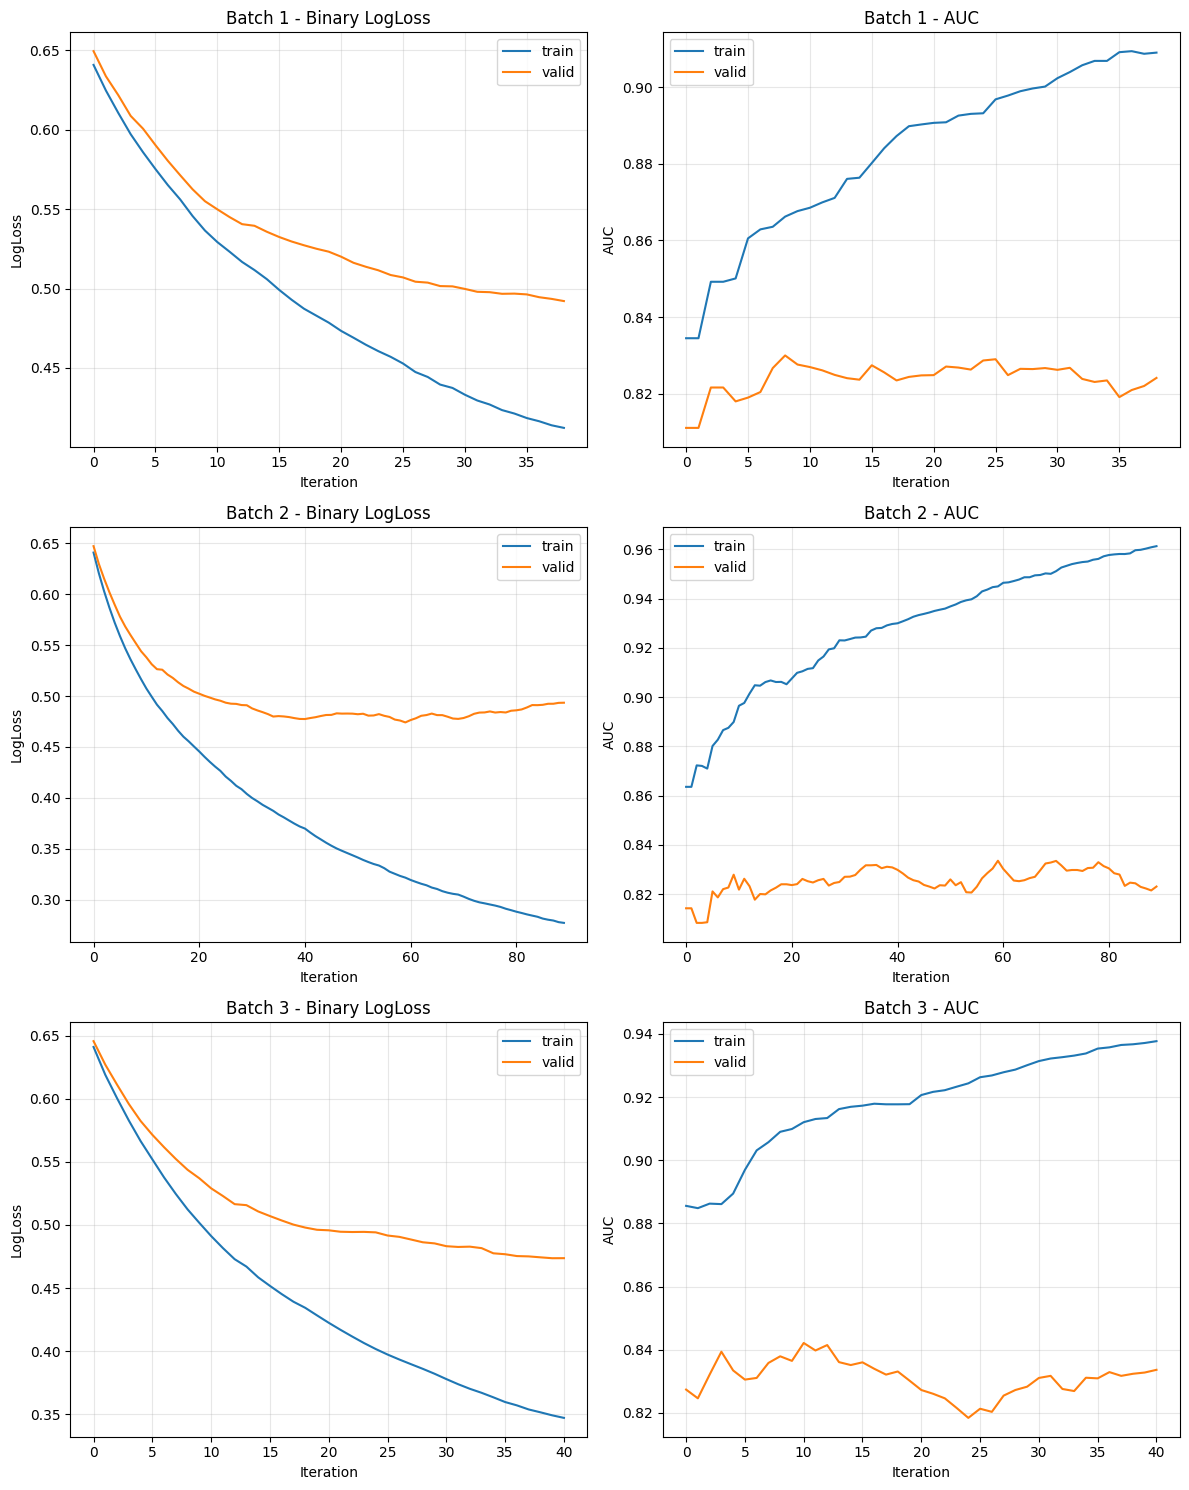

In [13]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score, log_loss
)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


def _ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Cette version est binaire. Reçu {y.nunique()} classes.")
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index)
    return yy.astype(int), le


def _align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """Convertit object/category en category et aligne train/valid. Bool -> int."""
    X_train = X_train.copy()
    X_valid = X_valid.copy()

    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
    for col in cat_cols:
        cats = pd.Categorical(X_train[col]).categories
        X_train[col] = pd.Categorical(X_train[col], categories=cats)
        X_valid[col] = pd.Categorical(X_valid[col], categories=cats)

    bool_cols = X_train.select_dtypes(include=["bool"]).columns
    if len(bool_cols) > 0:
        X_train[bool_cols] = X_train[bool_cols].astype(int)
        X_valid[bool_cols] = X_valid[bool_cols].astype(int)

    return X_train, X_valid, cat_cols


def train_lgbm_binary_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    label_col: str,
    n_batches: int = 5,
    num_boost_round: int = 300,
    early_stopping_rounds: int = 50,
    random_state: int = 42,
    lgb_params: dict | None = None,
):
    """
    Entraînement LightGBM binaire en batches cumulés.
    Retourne { 'reports': [...], 'models': [...], 'label_encoder': le }.
    """
    # split
    X_train = train_df.drop(columns=[label_col])
    y_train = train_df[label_col]
    X_valid = valid_df.drop(columns=[label_col])
    y_valid = valid_df[label_col]

    # labels {0,1}
    y_train_enc, le = _ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
        if le is not None else y_valid.astype(int)
    )

    # features catégorielles
    X_train, X_valid, cat_cols = _align_categoricals_for_lgbm(X_train, X_valid)

    # params LightGBM
    params = {
        "objective": "binary",
        "metric": ["binary_logloss", "auc"],
        "learning_rate": 0.05,
        "num_leaves": 31,
        "feature_fraction": 0.9,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
        "seed": random_state,
    }
    if lgb_params:
        params.update(lgb_params)

    # batches
    rng = np.random.default_rng(random_state)
    idx = np.arange(len(X_train))
    rng.shuffle(idx)
    batches_idx = np.array_split(idx, n_batches)

    results = {"reports": [], "models": [], "label_encoder": le}

    cum_idx = np.array([], dtype=int)
    print("=== DÉBUT: entraînement binaire par batches ===")
    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])

        train_data = lgb.Dataset(
            X_train.iloc[cum_idx],
            label=y_train_enc.iloc[cum_idx],
            categorical_feature=cat_cols
        )
        valid_data = lgb.Dataset(
            X_valid,
            label=y_valid_enc,
            reference=train_data,
            categorical_feature=cat_cols
        )

        evals_result = {}
        model = lgb.train(
            params,
            train_data,
            valid_sets=[train_data, valid_data],
            valid_names=["train", "valid"],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds, verbose=False),
                lgb.record_evaluation(evals_result),
            ],
        )

        # prédictions
        proba_valid = model.predict(X_valid, num_iteration=model.best_iteration)
        proba_train = model.predict(X_train.iloc[cum_idx], num_iteration=model.best_iteration)
        pred_valid = (proba_valid >= 0.5).astype(int)
        pred_train = (proba_train >= 0.5).astype(int)

        try:
            auc_v = float(roc_auc_score(y_valid_enc, proba_valid))
        except Exception:
            auc_v = np.nan

        report = {
            "batch": b,
            "cumulative_samples": int(len(cum_idx)),
            "best_iteration": int(model.best_iteration),
            "metrics": {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0, 1])),
                "auc_valid": auc_v,
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
                "accuracy_train": float(accuracy_score(y_train_enc.iloc[cum_idx], pred_train)),
                "f1_train": float(f1_score(y_train_enc.iloc[cum_idx], pred_train, average="binary")),
            },
            "evals_result": evals_result,
        }
        results["reports"].append(report)
        results["models"].append(model)

        m = report["metrics"]
        print(f"[Batch {b}/{len(batches_idx)}] n_cum={report['cumulative_samples']}, "
              f"best_iter={report['best_iteration']}, "
              f"logloss_v={m['logloss_valid']:.4f}, auc_v={m['auc_valid']:.4f}, "
              f"acc_v={m['accuracy_valid']:.4f}, f1_v={m['f1_valid']:.4f}")

    # meilleur batch
    def key_auc_then_acc(r):
        auc = r["metrics"]["auc_valid"]
        return (-(auc if not np.isnan(auc) else -1e9), -r["metrics"]["accuracy_valid"])

    best = sorted(results["reports"], key=key_auc_then_acc)[0]
    print(f"\n🏁 Terminé. Meilleur batch = {best['batch']} "
          f"(AUC={best['metrics']['auc_valid']:.4f}, "
          f"Acc={best['metrics']['accuracy_valid']:.4f})")

    return results


# --- fonction de plot ---
def plot_learning_curves_per_batch(results, figsize=(12, 5)):
    """
    Affiche les courbes train/valid pour binary_logloss et AUC à chaque batch.
    """
    n_batches = len(results["reports"])
    fig, axes = plt.subplots(n_batches, 2, figsize=(figsize[0], figsize[1]*n_batches))

    if n_batches == 1:
        axes = np.array([axes])  # homogénéité

    for i, r in enumerate(results["reports"]):
        evals = r["evals_result"]

        # LogLoss
        ax1 = axes[i, 0]
        ax1.plot(evals["train"]["binary_logloss"], label="train")
        ax1.plot(evals["valid"]["binary_logloss"], label="valid")
        ax1.set_title(f"Batch {r['batch']} - Binary LogLoss")
        ax1.set_xlabel("Iteration"); ax1.set_ylabel("LogLoss")
        ax1.legend(); ax1.grid(True, alpha=0.3)

        # AUC
        ax2 = axes[i, 1]
        ax2.plot(evals["train"]["auc"], label="train")
        ax2.plot(evals["valid"]["auc"], label="valid")
        ax2.set_title(f"Batch {r['batch']} - AUC")
        ax2.set_xlabel("Iteration"); ax2.set_ylabel("AUC")
        ax2.legend(); ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()



target_column = "Survived"
res = train_lgbm_binary_in_batches(
    train_df=train_df,
    valid_df=valid_df,
    label_col=target_column,
    n_batches=3,
    num_boost_round=200,
    early_stopping_rounds=30,
)

plot_learning_curves_per_batch(res)


=== DÉBUT: entraînement binaire par batches ===
[Batch 1/5] n_cum=143, best_iter=108, logloss_v=0.4970, auc_v=0.8173, acc_v=0.7933, f1_v=0.7087
[Batch 2/5] n_cum=286, best_iter=44, logloss_v=0.4891, auc_v=0.8107, acc_v=0.7933, f1_v=0.6783
[Batch 3/5] n_cum=428, best_iter=65, logloss_v=0.4680, auc_v=0.8402, acc_v=0.7989, f1_v=0.7143
[Batch 4/5] n_cum=570, best_iter=50, logloss_v=0.4795, auc_v=0.8253, acc_v=0.7933, f1_v=0.6992
[Batch 5/5] n_cum=712, best_iter=55, logloss_v=0.4690, auc_v=0.8338, acc_v=0.8045, f1_v=0.7154

🏁 Terminé. Meilleur batch = 3 (AUC=0.8402, Acc=0.7989)


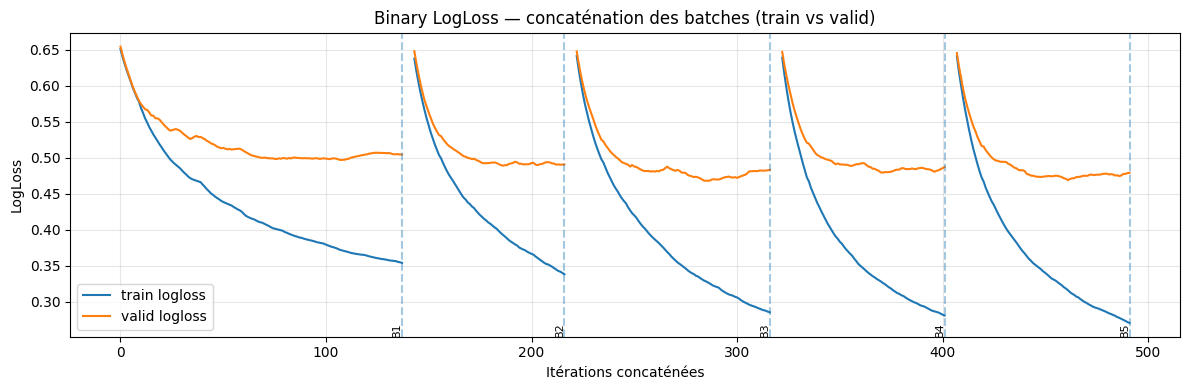

In [14]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score, log_loss
)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


# ---------- Utils ----------
def _ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Version binaire uniquement. Reçu {y.nunique()} classes.")
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index)
    return yy.astype(int), le


def _align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """Convertit object/category en category, aligne train/valid, bool -> int."""
    X_train = X_train.copy()
    X_valid = X_valid.copy()

    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
    for col in cat_cols:
        cats = pd.Categorical(X_train[col]).categories
        X_train[col] = pd.Categorical(X_train[col], categories=cats)
        X_valid[col] = pd.Categorical(X_valid[col], categories=cats)

    bool_cols = X_train.select_dtypes(include=["bool"]).columns
    if len(bool_cols) > 0:
        X_train[bool_cols] = X_train[bool_cols].astype(int)
        X_valid[bool_cols] = X_valid[bool_cols].astype(int)

    return X_train, X_valid, cat_cols


# ---------- Entraînement ----------
def train_lgbm_binary_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    label_col: str,
    n_batches: int = 5,
    num_boost_round: int = 300,
    early_stopping_rounds: int = 50,
    random_state: int = 42,
    lgb_params: dict | None = None,
):
    """
    Entraînement LightGBM binaire en batches cumulés (éval = binary_logloss uniquement).
    Retourne { 'reports': [...], 'models': [...], 'label_encoder': le }.
    """
    # split
    X_train = train_df.drop(columns=[label_col])
    y_train = train_df[label_col]
    X_valid = valid_df.drop(columns=[label_col])
    y_valid = valid_df[label_col]

    # labels {0,1}
    y_train_enc, le = _ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
        if le is not None else y_valid.astype(int)
    )

    # features
    X_train, X_valid, cat_cols = _align_categoricals_for_lgbm(X_train, X_valid)

    # params LightGBM : **UNE SEULE metric d'éval**
    params = {
        "objective": "binary",
        "metric": ["binary_logloss"],   # <- eval unique
        "learning_rate": 0.05,
        "num_leaves": 31,
        "feature_fraction": 0.9,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
        "seed": random_state,
    }
    if lgb_params:
        params.update(lgb_params)

    # batches
    rng = np.random.default_rng(random_state)
    idx = np.arange(len(X_train))
    rng.shuffle(idx)
    batches_idx = np.array_split(idx, n_batches)

    results = {"reports": [], "models": [], "label_encoder": le}

    cum_idx = np.array([], dtype=int)
    print("=== DÉBUT: entraînement binaire par batches ===")
    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])

        train_data = lgb.Dataset(
            X_train.iloc[cum_idx],
            label=y_train_enc.iloc[cum_idx],
            categorical_feature=cat_cols
        )
        valid_data = lgb.Dataset(
            X_valid,
            label=y_valid_enc,
            reference=train_data,
            categorical_feature=cat_cols
        )

        evals_result = {}
        model = lgb.train(
            params,
            train_data,
            valid_sets=[train_data, valid_data],
            valid_names=["train", "valid"],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds, verbose=False),
                lgb.record_evaluation(evals_result),
            ],
        )

        # prédictions & métriques finales (pour reporting)
        proba_valid = model.predict(X_valid, num_iteration=model.best_iteration)
        proba_train = model.predict(X_train.iloc[cum_idx], num_iteration=model.best_iteration)
        pred_valid = (proba_valid >= 0.5).astype(int)
        pred_train = (proba_train >= 0.5).astype(int)

        try:
            auc_v = float(roc_auc_score(y_valid_enc, proba_valid))
        except Exception:
            auc_v = np.nan

        report = {
            "batch": b,
            "cumulative_samples": int(len(cum_idx)),
            "best_iteration": int(model.best_iteration),
            "metrics": {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0, 1])),
                "auc_valid": auc_v,
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
                "accuracy_train": float(accuracy_score(y_train_enc.iloc[cum_idx], pred_train)),
                "f1_train": float(f1_score(y_train_enc.iloc[cum_idx], pred_train, average="binary")),
            },
            "evals_result": evals_result,  # contient 'train'/'valid' -> 'binary_logloss' par itération
        }
        results["reports"].append(report)
        results["models"].append(model)

        m = report["metrics"]
        print(f"[Batch {b}/{len(batches_idx)}] n_cum={report['cumulative_samples']}, "
              f"best_iter={report['best_iteration']}, "
              f"logloss_v={m['logloss_valid']:.4f}, "
              f"auc_v={m['auc_valid']:.4f}, acc_v={m['accuracy_valid']:.4f}, f1_v={m['f1_valid']:.4f}")

    # meilleur batch (max AUC puis accuracy)
    def key_auc_then_acc(r):
        auc = r["metrics"]["auc_valid"]
        return (-(auc if not np.isnan(auc) else -1e9), -r["metrics"]["accuracy_valid"])

    best = sorted(results["reports"], key=key_auc_then_acc)[0]
    print(f"\n🏁 Terminé. Meilleur batch = {best['batch']} "
          f"(AUC={best['metrics']['auc_valid']:.4f}, Acc={best['metrics']['accuracy_valid']:.4f})")

    return results


# ---------- Plot unique : concaténation logloss train/valid ----------
def plot_concatenated_logloss(results, gap_points: int = 5, show_batch_boundaries: bool = True, figsize=(12,4)):
    """
    Concatène bout-à-bout les courbes 'binary_logloss' de train et valid pour tous les batches,
    et les trace sur un seul graphique. Ajoute des lignes verticales aux fins de batch.
    """
    concat_train, concat_valid = [], []
    batch_end_positions = []

    for i, r in enumerate(results["reports"], start=1):
        evals = r["evals_result"]
        tr = evals["train"]["binary_logloss"]
        va = evals["valid"]["binary_logloss"]

        concat_train.extend(tr)
        concat_valid.extend(va)
        batch_end_positions.append(len(concat_train) - 1)

        if i < len(results["reports"]) and gap_points > 0:
            concat_train.extend([np.nan] * gap_points)
            concat_valid.extend([np.nan] * gap_points)

    x = np.arange(len(concat_train))
    plt.figure(figsize=figsize)
    plt.plot(x, concat_train, label="train logloss")
    plt.plot(x, concat_valid, label="valid logloss")
    plt.title("Binary LogLoss — concaténation des batches (train vs valid)")
    plt.xlabel("Itérations concaténées")
    plt.ylabel("LogLoss")
    plt.grid(True, alpha=0.3)
    plt.legend()

    if show_batch_boundaries:
        for j, pos in enumerate(batch_end_positions, start=1):
            plt.axvline(pos, linestyle="--", alpha=0.4)
            # petit label en bas
            ymin, _ = plt.gca().get_ylim()
            plt.text(pos, ymin, f"B{j}", va="bottom", ha="right", rotation=90, fontsize=8)

    plt.tight_layout()
    plt.show()


# ---------- Exemple d'utilisation ----------
target_column = "Survived"
res = train_lgbm_binary_in_batches(
     train_df=train_df,
     valid_df=valid_df,
     label_col=target_column,
     n_batches=5,
     num_boost_round=200,
     early_stopping_rounds=30,
 )
plot_concatenated_logloss(res, gap_points=5, show_batch_boundaries=True)


=== DÉBUT: entraînement binaire par batches ===
[Batch 1/5] n_cum=143, best_iter=108, logloss_v=0.4970, auc_v=0.8173, acc_v=0.7933, f1_v=0.7087
[Batch 2/5] n_cum=286, best_iter=44, logloss_v=0.4891, auc_v=0.8107, acc_v=0.7933, f1_v=0.6783
[Batch 3/5] n_cum=428, best_iter=65, logloss_v=0.4680, auc_v=0.8402, acc_v=0.7989, f1_v=0.7143
[Batch 4/5] n_cum=570, best_iter=50, logloss_v=0.4795, auc_v=0.8253, acc_v=0.7933, f1_v=0.6992
[Batch 5/5] n_cum=712, best_iter=55, logloss_v=0.4690, auc_v=0.8338, acc_v=0.8045, f1_v=0.7154

🏁 Terminé. Meilleur batch = 3 (AUC=0.8402, Acc=0.7989)


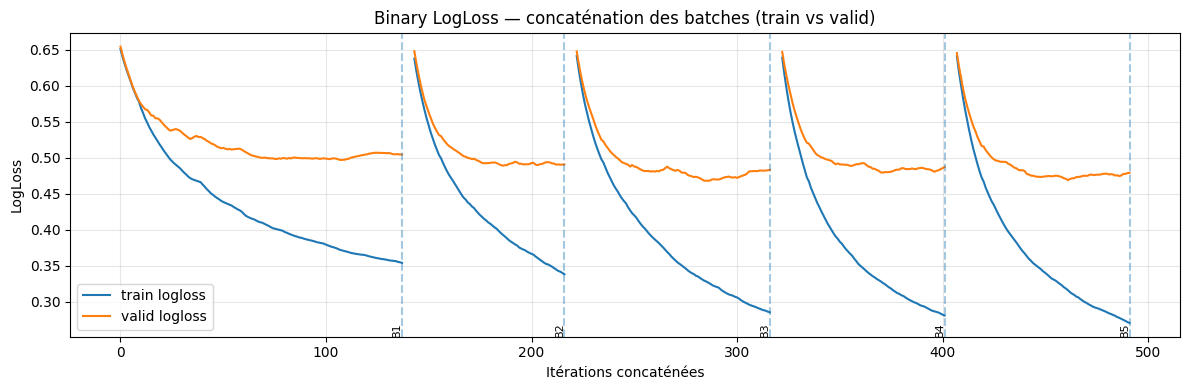

In [15]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, log_loss
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


# ---------- Utils minimales ----------
def _ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Version binaire uniquement. Reçu {y.nunique()} classes.")
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index)
    return yy.astype(int), le


def _align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """Convertit object/category en category, aligne train/valid, bool -> int."""
    X_train = X_train.copy()
    X_valid = X_valid.copy()

    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
    for col in cat_cols:
        cats = pd.Categorical(X_train[col]).categories
        X_train[col] = pd.Categorical(X_train[col], categories=cats)
        X_valid[col] = pd.Categorical(X_valid[col], categories=cats)

    bool_cols = X_train.select_dtypes(include=["bool"]).columns
    if len(bool_cols) > 0:
        X_train[bool_cols] = X_train[bool_cols].astype(int)
        X_valid[bool_cols] = X_valid[bool_cols].astype(int)

    return X_train, X_valid, cat_cols


# ---------- Plot unique : concaténation logloss train/valid ----------
def plot_concatenated_logloss(results, gap_points: int = 5, show_batch_boundaries: bool = True, figsize=(12,4)):
    """
    Concatène bout-à-bout les courbes 'binary_logloss' de train et valid pour tous les batches,
    et les trace sur un seul graphique. Ajoute des lignes verticales aux fins de batch.
    """
    concat_train, concat_valid = [], []
    batch_end_positions = []

    for i, r in enumerate(results["reports"], start=1):
        evals = r["evals_result"]
        tr = evals["train"]["binary_logloss"]
        va = evals["valid"]["binary_logloss"]

        concat_train.extend(tr)
        concat_valid.extend(va)
        batch_end_positions.append(len(concat_train) - 1)

        if i < len(results["reports"]) and gap_points > 0:
            concat_train.extend([np.nan] * gap_points)
            concat_valid.extend([np.nan] * gap_points)

    x = np.arange(len(concat_train))
    plt.figure(figsize=figsize)
    plt.plot(x, concat_train, label="train logloss")
    plt.plot(x, concat_valid, label="valid logloss")
    plt.title("Binary LogLoss — concaténation des batches (train vs valid)")
    plt.xlabel("Itérations concaténées")
    plt.ylabel("LogLoss")
    plt.grid(True, alpha=0.3)
    plt.legend()

    if show_batch_boundaries:
        for j, pos in enumerate(batch_end_positions, start=1):
            plt.axvline(pos, linestyle="--", alpha=0.4)
            ymin, _ = plt.gca().get_ylim()
            plt.text(pos, ymin, f"B{j}", va="bottom", ha="right", rotation=90, fontsize=8)

    plt.tight_layout()
    plt.show()


# =========================
# ======== SCRIPT =========
# =========================
# Hypothèse: tu as déjà train_df / valid_df en mémoire
target_column = "Survived"   # adapte si besoin

# 1) Split X/y
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_valid = valid_df.drop(columns=[target_column])
y_valid = valid_df[target_column]

# 2) Labels binaires {0,1}
y_train_enc, le = _ensure_binary_labels(y_train)
y_valid_enc = (
    pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
    if le is not None else y_valid.astype(int)
)

# 3) Préparer les features (catégorielles & bool)
X_train, X_valid, cat_cols = _align_categoricals_for_lgbm(X_train, X_valid)

# 4) Paramètres LightGBM (éval = binary_logloss uniquement)
num_boost_round = 200
early_stopping_rounds = 30
random_state = 42
n_batches = 5

params = {
    "objective": "binary",
    "metric": ["binary_logloss"],   # <- eval unique
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": -1,
    "seed": random_state,
}

# 5) Création des batches (shuffle reproductible)
rng = np.random.default_rng(random_state)
idx = np.arange(len(X_train))
rng.shuffle(idx)
batches_idx = np.array_split(idx, n_batches)

# 6) Boucle d'entraînement par batch (cumulatif)
results = {"reports": [], "models": [], "label_encoder": le}
cum_idx = np.array([], dtype=int)

print("=== DÉBUT: entraînement binaire par batches ===")
for b, b_idx in enumerate(batches_idx, start=1):
    # cumuler les données
    cum_idx = np.concatenate([cum_idx, b_idx])

    # Datasets LGBM
    train_data = lgb.Dataset(
        X_train.iloc[cum_idx],
        label=y_train_enc.iloc[cum_idx],
        categorical_feature=cat_cols
    )
    valid_data = lgb.Dataset(
        X_valid,
        label=y_valid_enc,
        reference=train_data,
        categorical_feature=cat_cols
    )

    # Train
    evals_result = {}
    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, valid_data],
        valid_names=["train", "valid"],
        num_boost_round=num_boost_round,
        callbacks=[
            lgb.early_stopping(early_stopping_rounds, verbose=False),
            lgb.record_evaluation(evals_result),
        ],
    )

    # Prédictions & métriques (post-train)
    proba_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    proba_train = model.predict(X_train.iloc[cum_idx], num_iteration=model.best_iteration)
    pred_valid = (proba_valid >= 0.5).astype(int)
    pred_train = (proba_train >= 0.5).astype(int)

    try:
        auc_v = float(roc_auc_score(y_valid_enc, proba_valid))
    except Exception:
        auc_v = np.nan

    report = {
        "batch": b,
        "cumulative_samples": int(len(cum_idx)),
        "best_iteration": int(model.best_iteration),
        "metrics": {
            "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0, 1])),
            "auc_valid": auc_v,
            "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
            "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
            "accuracy_train": float(accuracy_score(y_train_enc.iloc[cum_idx], pred_train)),
            "f1_train": float(f1_score(y_train_enc.iloc[cum_idx], pred_train, average="binary")),
        },
        "evals_result": evals_result,  # 'train'/'valid' -> 'binary_logloss' par itération
    }
    results["reports"].append(report)
    results["models"].append(model)

    m = report["metrics"]
    print(f"[Batch {b}/{len(batches_idx)}] n_cum={report['cumulative_samples']}, "
          f"best_iter={report['best_iteration']}, "
          f"logloss_v={m['logloss_valid']:.4f}, "
          f"auc_v={m['auc_valid']:.4f}, acc_v={m['accuracy_valid']:.4f}, f1_v={m['f1_valid']:.4f}")

# 7) Sélection du meilleur batch (max AUC puis accuracy)
def _key_auc_then_acc(r):
    auc = r["metrics"]["auc_valid"]
    return (-(auc if not np.isnan(auc) else -1e9), -r["metrics"]["accuracy_valid"])

best = sorted(results["reports"], key=_key_auc_then_acc)[0]
print(f"\n🏁 Terminé. Meilleur batch = {best['batch']} "
      f"(AUC={best['metrics']['auc_valid']:.4f}, Acc={best['metrics']['accuracy_valid']:.4f})")

# 8) Courbe unique : concaténation logloss train vs valid
plot_concatenated_logloss(results, gap_points=5, show_batch_boundaries=True)


=== DÉBUT: entraînement binaire par batches (LR exponentiel) ===
[Batch 1/5] n_cum=143, best_iter=160, logloss_v=0.5001, auc_v=0.8161, acc_v=0.7877, f1_v=0.7031
[Batch 2/5] n_cum=286, best_iter=90, logloss_v=0.4810, auc_v=0.8205, acc_v=0.8101, f1_v=0.7167
[Batch 3/5] n_cum=428, best_iter=70, logloss_v=0.4682, auc_v=0.8380, acc_v=0.8156, f1_v=0.7317
[Batch 4/5] n_cum=570, best_iter=73, logloss_v=0.4764, auc_v=0.8305, acc_v=0.7989, f1_v=0.7143
[Batch 5/5] n_cum=712, best_iter=55, logloss_v=0.4827, auc_v=0.8138, acc_v=0.7933, f1_v=0.7040

🏁 Terminé. Meilleur batch = 3 (AUC=0.8380, Acc=0.8156)


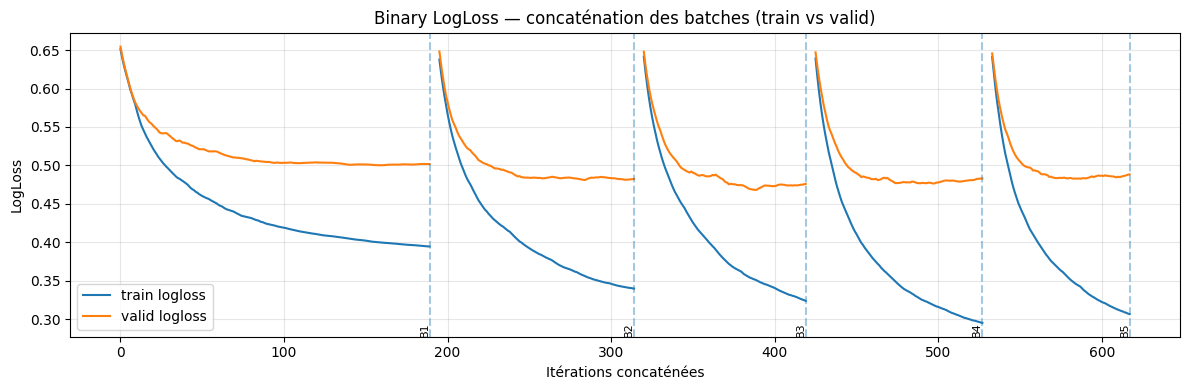

25/09/08 18:13:16 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:53)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:342)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:132)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:131)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:700)
	at org.apache.spark.storage.BlockManagerMasterE

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, log_loss
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


# ---------- Utils minimales ----------
def _ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Version binaire uniquement. Reçu {y.nunique()} classes.")
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index)
    return yy.astype(int), le


def _align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """Convertit object/category en category, aligne train/valid, bool -> int."""
    X_train = X_train.copy()
    X_valid = X_valid.copy()

    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
    for col in cat_cols:
        cats = pd.Categorical(X_train[col]).categories
        X_train[col] = pd.Categorical(X_train[col], categories=cats)
        X_valid[col] = pd.Categorical(X_valid[col], categories=cats)

    bool_cols = X_train.select_dtypes(include=["bool"]).columns
    if len(bool_cols) > 0:
        X_train[bool_cols] = X_train[bool_cols].astype(int)
        X_valid[bool_cols] = X_valid[bool_cols].astype(int)

    return X_train, X_valid, cat_cols


# ---------- Plot unique : concaténation logloss train/valid ----------
def plot_concatenated_logloss(results, gap_points: int = 5, show_batch_boundaries: bool = True, figsize=(12,4)):
    """
    Concatène bout-à-bout les courbes 'binary_logloss' de train et valid pour tous les batches,
    et les trace sur un seul graphique. Ajoute des lignes verticales aux fins de batch.
    """
    concat_train, concat_valid = [], []
    batch_end_positions = []

    for i, r in enumerate(results["reports"], start=1):
        evals = r["evals_result"]
        tr = evals["train"]["binary_logloss"]
        va = evals["valid"]["binary_logloss"]

        concat_train.extend(tr)
        concat_valid.extend(va)
        batch_end_positions.append(len(concat_train) - 1)

        if i < len(results["reports"]) and gap_points > 0:
            concat_train.extend([np.nan] * gap_points)
            concat_valid.extend([np.nan] * gap_points)

    x = np.arange(len(concat_train))
    plt.figure(figsize=figsize)
    plt.plot(x, concat_train, label="train logloss")
    plt.plot(x, concat_valid, label="valid logloss")
    plt.title("Binary LogLoss — concaténation des batches (train vs valid)")
    plt.xlabel("Itérations concaténées")
    plt.ylabel("LogLoss")
    plt.grid(True, alpha=0.3)
    plt.legend()

    if show_batch_boundaries:
        for j, pos in enumerate(batch_end_positions, start=1):
            plt.axvline(pos, linestyle="--", alpha=0.4)
            ymin, _ = plt.gca().get_ylim()
            plt.text(pos, ymin, f"B{j}", va="bottom", ha="right", rotation=90, fontsize=8)

    plt.tight_layout()
    plt.show()


# =========================
# ======== SCRIPT =========
# =========================
# Hypothèse: train_df / valid_df existent déjà
target_column = "Survived"   # adapte si besoin

# 1) Split X/y
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_valid = valid_df.drop(columns=[target_column])
y_valid = valid_df[target_column]

# 2) Labels binaires {0,1}
y_train_enc, le = _ensure_binary_labels(y_train)
y_valid_enc = (
    pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
    if le is not None else y_valid.astype(int)
)

# 3) Préparer les features (catégorielles & bool)
X_train, X_valid, cat_cols = _align_categoricals_for_lgbm(X_train, X_valid)

# 4) Hyperparamètres & scheduler exponentiel
num_boost_round = 200
early_stopping_rounds = 30
random_state = 42
n_batches = 5

# LR initial et décroissance exponentielle: lr_t = lr0 * exp(-decay * t)
lr0 = 0.05
decay = 0.01   # ↑ plus grand => décroissance plus rapide

params = {
    "objective": "binary",
    "metric": ["binary_logloss"],   # éval unique
    "learning_rate": lr0,           # lr initial (sera ajusté par le scheduler)
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": -1,
    "seed": random_state,
}

# 5) Création des batches (shuffle reproductible)
rng = np.random.default_rng(random_state)
idx = np.arange(len(X_train))
rng.shuffle(idx)
batches_idx = np.array_split(idx, n_batches)

# 6) Boucle d'entraînement par batch (cumulatif) + scheduler exponentiel
results = {"reports": [], "models": [], "label_encoder": le}
cum_idx = np.array([], dtype=int)

print("=== DÉBUT: entraînement binaire par batches (LR exponentiel) ===")
for b, b_idx in enumerate(batches_idx, start=1):
    # cumuler les données
    cum_idx = np.concatenate([cum_idx, b_idx])

    # Datasets LGBM
    train_data = lgb.Dataset(
        X_train.iloc[cum_idx],
        label=y_train_enc.iloc[cum_idx],
        categorical_feature=cat_cols
    )
    valid_data = lgb.Dataset(
        X_valid,
        label=y_valid_enc,
        reference=train_data,
        categorical_feature=cat_cols
    )

    # Callback: learning rate scheduler exponentiel
    def exponential_lr(cur_iter):
        # cur_iter: 0..num_boost_round-1
        return lr0 * np.exp(-decay * cur_iter)

    # Train
    evals_result = {}
    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, valid_data],
        valid_names=["train", "valid"],
        num_boost_round=num_boost_round,
        callbacks=[
            lgb.early_stopping(early_stopping_rounds, verbose=False),
            lgb.record_evaluation(evals_result),
            lgb.reset_parameter(learning_rate=exponential_lr),  # <-- scheduler exponentiel
        ],
    )

    # Prédictions & métriques (post-train)
    proba_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    proba_train = model.predict(X_train.iloc[cum_idx], num_iteration=model.best_iteration)
    pred_valid = (proba_valid >= 0.5).astype(int)
    pred_train = (proba_train >= 0.5).astype(int)

    try:
        auc_v = float(roc_auc_score(y_valid_enc, proba_valid))
    except Exception:
        auc_v = np.nan

    report = {
        "batch": b,
        "cumulative_samples": int(len(cum_idx)),
        "best_iteration": int(model.best_iteration),
        "metrics": {
            "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0, 1])),
            "auc_valid": auc_v,
            "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
            "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
            "accuracy_train": float(accuracy_score(y_train_enc.iloc[cum_idx], pred_train)),
            "f1_train": float(f1_score(y_train_enc.iloc[cum_idx], pred_train, average="binary")),
        },
        "evals_result": evals_result,  # 'train'/'valid' -> 'binary_logloss' par itération
    }
    results["reports"].append(report)
    results["models"].append(model)

    m = report["metrics"]
    print(f"[Batch {b}/{len(batches_idx)}] n_cum={report['cumulative_samples']}, "
          f"best_iter={report['best_iteration']}, "
          f"logloss_v={m['logloss_valid']:.4f}, "
          f"auc_v={m['auc_valid']:.4f}, acc_v={m['accuracy_valid']:.4f}, f1_v={m['f1_valid']:.4f}")

# 7) Sélection du meilleur batch (max AUC puis accuracy)
def _key_auc_then_acc(r):
    auc = r["metrics"]["auc_valid"]
    return (-(auc if not np.isnan(auc) else -1e9), -r["metrics"]["accuracy_valid"])

best = sorted(results["reports"], key=_key_auc_then_acc)[0]
print(f"\n🏁 Terminé. Meilleur batch = {best['batch']} "
      f"(AUC={best['metrics']['auc_valid']:.4f}, Acc={best['metrics']['accuracy_valid']:.4f})")

# 8) Courbe unique : concaténation logloss train vs valid
plot_concatenated_logloss(results, gap_points=5, show_batch_boundaries=True)

# (Optionnel) Visualiser le schedule LR utilisé sur 1 batch
# lr_schedule = [lr0 * np.exp(-decay * t) for t in range(num_boost_round)]
# plt.figure(figsize=(8,3)); plt.plot(lr_schedule)
# plt.title("Exponential Learning Rate Schedule"); plt.xlabel("Iteration"); plt.ylabel("LR"); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()


In [5]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    roc_auc_score, accuracy_score, f1_score, log_loss
)
import warnings
warnings.filterwarnings('ignore')


# ---------- Utils génériques ----------
def _detect_task_type(y: pd.Series, multiclass_max_classes: int = 100):
    """Retourne 'regression' | 'binary' | 'multiclass'."""
    # Si dtype numérique flottant avec bcp de valeurs uniques -> régression
    nunique = y.nunique(dropna=False)
    if nunique == 2:
        return "binary"
    # multiclass si nombre de classes raisonnable
    if (np.issubdtype(y.dtype, np.integer) or y.dtype == "object") and 3 <= nunique <= multiclass_max_classes:
        return "multiclass"
    # sinon, régression par défaut
    return "regression"


def _prepare_labels(y_train: pd.Series, y_valid: pd.Series, task_type: str):
    """Encode labels si nécessaire et retourne (y_train_enc, y_valid_enc, label_decoder or None)."""
    if task_type == "regression":
        return y_train.astype(float), y_valid.astype(float), None

    # classification -> encoder si besoin (LightGBM demande int [0..K-1] pour multiclass)
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_valid_enc = le.transform(y_valid)
    return pd.Series(y_train_enc), pd.Series(y_valid_enc), le


def _auto_lgb_params(task_type: str):
    if task_type == "regression":
        return {"objective": "regression", "metric": "rmse"}
    if task_type == "binary":
        return {"objective": "binary", "metric": ["binary_logloss", "auc"]}
    # multiclass
    return {"objective": "multiclass", "metric": ["multi_logloss", "auc_mu"]}


def _merge_params(base: dict, override: dict | None):
    out = base.copy()
    if override:
        out.update(override)
    return out


# ---------- API principale ----------
def batch_training_lightgbm_generic(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    label_column: str,
    n_batches: int = 5,
    lgb_params: dict | None = None,
    num_boost_round: int = 200,
    early_stopping_rounds: int = 50,
    random_state: int = 42,
):
    """
    Entraîne un LightGBM en batch cumulatif (régression, binaire ou multiclasse).
    S'adapte automatiquement au type de tâche et calcule les métriques correspondantes.

    Returns
    -------
    dict : {
        'task_type': str,
        'batch_reports': [ { 'batch': int, 'cumulative_samples': int, 'metrics': {..}, 'best_iteration': int } ],
        'models': [lgb.Booster, ...],
        'histories': [evals_result, ...]
    }
    """

    # Split X/y
    X_train = train_df.drop(columns=[label_column])
    y_train = train_df[label_column]
    X_valid = valid_df.drop(columns=[label_column])
    y_valid = valid_df[label_column]

    # Détection du type de tâche
    task_type = _detect_task_type(y_train)

    # Encodage labels si nécessaire
    y_train_enc, y_valid_enc, label_decoder = _prepare_labels(y_train, y_valid, task_type)

    # Paramètres LightGBM
    base_params = {
        "boosting_type": "gbdt",
        "num_leaves": 31,
        "learning_rate": 0.05,
        "feature_fraction": 0.9,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
        "seed": random_state,
    }
    base_params.update(_auto_lgb_params(task_type))
    params = _merge_params(base_params, lgb_params)

    # Pour multiclass, préciser num_class
    if task_type == "multiclass":
        params["num_class"] = int(np.unique(y_train_enc).shape[0])

    # Découpage en batches
    n = len(train_df)
    batch_size = max(1, n // n_batches)
    batches = []
    for i in range(n_batches):
        start = i * batch_size
        end = n if i == n_batches - 1 else (i + 1) * batch_size
        batches.append((
            X_train.iloc[start:end],
            y_train_enc.iloc[start:end]
        ))

    results = {
        "task_type": task_type,
        "batch_reports": [],
        "models": [],
        "histories": [],
        "label_decoder": label_decoder,  # utile si tu veux retransformer des classes plus tard
    }

    cumulative_X = pd.DataFrame()
    cumulative_y = pd.Series(dtype=y_train_enc.dtype)

    print("=== DÉBUT DU BATCH TRAINING (générique) ===\nType de tâche détecté :", task_type.upper(), "\n")
    for b_idx, (bX, bY) in enumerate(batches, 1):
        cumulative_X = pd.concat([cumulative_X, bX], ignore_index=True)
        cumulative_y = pd.concat([cumulative_y, bY], ignore_index=True)

        train_data = lgb.Dataset(cumulative_X, label=cumulative_y)
        valid_data = lgb.Dataset(X_valid, label=y_valid_enc, reference=train_data)

        evals_result = {}
        model = lgb.train(
            params,
            train_data,
            valid_sets=[train_data, valid_data],
            #valid_names=["train", "valid"],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds, verbose=False),
                lgb.log_evaluation(period=0),
                lgb.record_evaluation(evals_result),
            ],
        )

        # Prédictions & métriques génériques
        if task_type == "regression":
            pred_train = model.predict(cumulative_X)
            pred_valid = model.predict(X_valid)

            metrics = {
                "rmse_train": float(np.sqrt(mean_squared_error(cumulative_y, pred_train))),
                "rmse_valid": float(np.sqrt(mean_squared_error(y_valid_enc, pred_valid))),
                "mae_train": float(mean_absolute_error(cumulative_y, pred_train)),
                "mae_valid": float(mean_absolute_error(y_valid_enc, pred_valid)),
                "r2_train": float(r2_score(cumulative_y, pred_train)),
                "r2_valid": float(r2_score(y_valid_enc, pred_valid)),
            }

        elif task_type == "binary":
            proba_train = model.predict(cumulative_X)  # proba classe 1
            proba_valid = model.predict(X_valid)
            pred_train = (proba_train >= 0.5).astype(int)
            pred_valid = (proba_valid >= 0.5).astype(int)

            # certaines métriques peuvent échouer si y est constant, gérer doucement
            metrics = {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0,1])),
                "auc_valid": float(roc_auc_score(y_valid_enc, proba_valid)) if len(np.unique(y_valid_enc)) == 2 else np.nan,
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
                "accuracy_train": float(accuracy_score(cumulative_y, pred_train)),
                "f1_train": float(f1_score(cumulative_y, pred_train, average="binary")),
            }

        else:  # multiclass
            proba_train = model.predict(cumulative_X)  # shape (n, K)
            proba_valid = model.predict(X_valid)
            pred_train = np.argmax(proba_train, axis=1)
            pred_valid = np.argmax(proba_valid, axis=1)

            metrics = {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid)),
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_macro_valid": float(f1_score(y_valid_enc, pred_valid, average="macro")),
                "accuracy_train": float(accuracy_score(cumulative_y, pred_train)),
                "f1_macro_train": float(f1_score(cumulative_y, pred_train, average="macro")),
            }

        report = {
            "batch": b_idx,
            "cumulative_samples": int(len(cumulative_X)),
            "metrics": metrics,
            "best_iteration": int(model.best_iteration),
        }
        results["batch_reports"].append(report)
        results["models"].append(model)
        results["histories"].append(evals_result)

        print(f"--- BATCH {b_idx}/{n_batches} ---")
        print(f"Échantillons cumulatifs: {len(cumulative_X)}")
        for k, v in metrics.items():
            print(f"{k}: {v:.4f}")
        print(f"Best iteration: {model.best_iteration}\n")

    return results


def plot_batch_results_generic(results, figsize=(14, 9)):
    """Trace l’évolution des métriques pertinentes selon le task_type."""
    task = results["task_type"]
    reports = results["batch_reports"]
    batches = [r["batch"] for r in reports]

    plt.figure(figsize=figsize)

    if task == "regression":
        rmse_valid = [r["metrics"]["rmse_valid"] for r in reports]
        rmse_train = [r["metrics"]["rmse_train"] for r in reports]
        r2_valid = [r["metrics"]["r2_valid"] for r in reports]

        plt.subplot(2,1,1)
        plt.plot(batches, rmse_train, marker="o", label="RMSE Train")
        plt.plot(batches, rmse_valid, marker="o", label="RMSE Valid")
        plt.xlabel("Batch"); plt.ylabel("RMSE"); plt.title("Évolution RMSE"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(2,1,2)
        plt.plot(batches, r2_valid, marker="o", label="R² Valid")
        plt.xlabel("Batch"); plt.ylabel("R²"); plt.title("Évolution R² (validation)"); plt.grid(True, alpha=0.3); plt.legend()

    elif task == "binary":
        acc_valid = [r["metrics"]["accuracy_valid"] for r in reports]
        f1_valid = [r["metrics"]["f1_valid"] for r in reports]
        auc_valid = [r["metrics"].get("auc_valid", np.nan) for r in reports]

        plt.subplot(3,1,1)
        plt.plot(batches, acc_valid, marker="o", label="Accuracy Valid")
        plt.xlabel("Batch"); plt.ylabel("Accuracy"); plt.title("Accuracy (validation)"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(3,1,2)
        plt.plot(batches, f1_valid, marker="o", label="F1 Valid")
        plt.xlabel("Batch"); plt.ylabel("F1"); plt.title("F1 (validation)"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(3,1,3)
        plt.plot(batches, auc_valid, marker="o", label="AUC Valid")
        plt.xlabel("Batch"); plt.ylabel("AUC"); plt.title("AUC (validation)"); plt.grid(True, alpha=0.3); plt.legend()

    else:  # multiclass
        acc_valid = [r["metrics"]["accuracy_valid"] for r in reports]
        f1_macro_valid = [r["metrics"]["f1_macro_valid"] for r in reports]
        logloss_valid = [r["metrics"]["logloss_valid"] for r in reports]

        plt.subplot(3,1,1)
        plt.plot(batches, acc_valid, marker="o", label="Accuracy Valid")
        plt.xlabel("Batch"); plt.ylabel("Accuracy"); plt.title("Accuracy (validation)"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(3,1,2)
        plt.plot(batches, f1_macro_valid, marker="o", label="F1 Macro Valid")
        plt.xlabel("Batch"); plt.ylabel("F1 Macro"); plt.title("F1 Macro (validation)"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(3,1,3)
        plt.plot(batches, logloss_valid, marker="o", label="LogLoss Valid")
        plt.xlabel("Batch"); plt.ylabel("LogLoss"); plt.title("LogLoss (validation)"); plt.grid(True, alpha=0.3); plt.legend()

    plt.tight_layout()
    plt.show()


def print_batch_summary_generic(results):
    task = results["task_type"]
    print("\n=== RÉSUMÉ GÉNÉRIQUE PAR BATCH ===")
    header = f"{'Batch':<6} {'Cum.Samples':<12} {'BestIter':<9}  Metrics"
    print(header)
    print("-"*len(header))
    for r in results["batch_reports"]:
        metrics_str = " | ".join([f"{k}={v:.4f}" for k, v in r["metrics"].items()])
        print(f"{r['batch']:<6} {r['cumulative_samples']:<12} {r['best_iteration']:<9}  {metrics_str}")

    # Sélection du "meilleur" batch selon une métrique pivot par task
    if task == "regression":
        key = lambda r: r["metrics"]["rmse_valid"]
        label = "RMSE Valid"
    elif task == "binary":
        # on maximise AUC; s’il n’existe pas, on maximise accuracy
        key = lambda r: (-r["metrics"].get("auc_valid", -np.inf), -r["metrics"]["accuracy_valid"])
        label = "AUC/Accuracy Valid"
    else:
        # on minimise logloss; à défaut on maximise accuracy
        key = lambda r: (r["metrics"]["logloss_valid"], -r["metrics"]["accuracy_valid"])
        label = "LogLoss/Accuracy Valid"

    best = sorted(results["batch_reports"], key=key)[0]
    print("\n🏆 MEILLEUR BATCH ->", best["batch"], f"({label})")




target_column = "Survived"
results = batch_training_lightgbm_generic(
    train_df=train_df,
    valid_df=valid_df,
    label_column=target_column,          # nom générique
    n_batches=5,
    lgb_params=None,                # tu peux surcharger (ex: {'learning_rate': 0.03})
    num_boost_round=300,
    early_stopping_rounds=50,
)

plot_batch_results_generic(results)
print_batch_summary_generic(results)

# Récupérer le meilleur modèle (ex: selon ta logique perso)
best_idx = np.argmin([r["metrics"].get("rmse_valid", np.inf) if results["task_type"]=="regression"
                      else -r["metrics"].get("auc_valid", r["metrics"].get("accuracy_valid", 0.0))
                      for r in results["batch_reports"]])
best_model = results["models"][best_idx]


=== DÉBUT DU BATCH TRAINING (générique) ===
Type de tâche détecté : BINARY 



ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: Sex: object, Ticket: object, Cabin: object, Embarked: object